<a href="https://colab.research.google.com/github/joaomr7/previsao-de-churn-telco/blob/main/Previs%C3%A3o_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Churn**

---

Churn, ou rotatividade, é o termo utilizado para descrever a situação em que os clientes encerram ou cancelam seus contratos ou assinaturas com uma empresa. Muitas empresas investem pesadamente na experiência do usuário, por exemplo, justamente para evitar que isto ocorra, pois o preço para conquistar um novo cliente acaba saindo mais caro que manter o cliente atual! Para terem resultados melhores, algumas delas adotam modelos de machine learning para prever quais clientes possuem maior probabildiade de abandonar o serviço, e apartir dos resultados tomarem as melhores decisões para manter o cliente.

<br>

<p align=center>
<img src="https://raw.githubusercontent.com/joaomr7/previsao-de-churn-telco/main/image/TelcoChurnImage.jpg" width="60%">
</p>

<br>

O objetivo deste projeto é, por meio de análise de dados e machine learning, desenvolver um modelo para sanar justamente a necessidade de prever o churn de clientes. Para isso, será utilizado um dataset de uma empresa de telecomunicações fictícia.

# **Metodologia**

Este notebook seguirá algumas etapas da metodologia CRISP-DM. As etapas serão:

1. **Entendimento do negócio**
2. **Compreensão dos dados**
3. **Preparação dos dados**
4. **Modelagem**
5. **Validação**

A etapa que será omitida é a de implantação, pois não está no objetivo deste notebook.

# **1. Entendimento do Negócio**

A empresa fictícia em questão, é a Telco. Nós possuímos um arquivo csv contendo informações sobre alguns clientes junto com uma variável alvo que indica se o cliente abandonou o serviço ou não. Claramente isto se trata de um problema de classificação binária.

Portanto, nosso objetivo é analisar e tratar os dados que temos, a fim de desenvolver um modelo de classificação. Com isso a empresa teria como tomar decisões de negócio para manter os clientes que possuem maior probabilidade de churn (os modelos de classificação nos fornecem essa probabilidade).

# **2. Compreensão dos Dados**

## **Adiquirindo os Dados**

Os dados utilizados neste projeto foram baixados na plataforma Kaggle. Para obter todas as informações sobre o dataset acesse a página onde baixei os dados [nesse link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data). Estarei usando a cópia em meu respositório no github disponível [nesse link](https://raw.githubusercontent.com/joaomr7/previsao-de-churn-telco/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv).

In [ ]:
# instalando os pacotes necessários
! pip install -q scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 11.4 MB/s eta 0:00:00


In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np

# plotar gráficos
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# acelerar algoritmos do sklearn
from sklearnex import patch_sklearn
patch_sklearn()

# split dos dados
from sklearn.model_selection import train_test_split

# pré processamento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# métricas
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# model tuning
from sklearn.model_selection import GridSearchCV

# outros
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# mudar estilo do seaborn
sns.set_style("darkgrid")

In [ ]:
# importando os dados
def load_telco_dataset():
  DATA_PATH = 'https://raw.githubusercontent.com/joaomr7/previsao-de-churn-telco/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'
  return pd.read_csv(DATA_PATH)

telco = load_telco_dataset()

## **Separando os Dados**

Para evitar que nosso modelo final possua algum viés no momento de validação, efetuarei uma divisão do conjunto de dados em treino e teste, dessa forma, impesso que haja vazamento de dados no modelo, e consigo avaliar o modelo final em dados nunca antes vistos.

Vamos fazer um divisão com as proporções 80%, para os dados de treino, e 20% para os dados de teste. Além disso, para manter a mesma proporção da variável alvo em cada divisão, executaremos uma divisão estratificada.

In [ ]:
telco_train, telco_test = train_test_split(telco, test_size=0.2, stratify=telco['Churn'], random_state=42)

Apartir de agora, não lidaremos mais com os dados de teste, para evitar qualquer vazamento de dados.

## **Análise Exploratória**

Esta etapa é uma das mais cruciais, pois aqui que compreendemos o dataset. Inicialmente, estarei fazendo uma análise discritiva de cada variável, buscando entender seu tipo e significado e apartir disso, montar um dicionário de variáveis.

In [ ]:
# aumentar o número máximo de colunas que podem ser exibidas
pd.set_option('display.max_columns', telco_train.shape[1])

# visualizar primeiras linhas do dataset
telco_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
3810,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


In [ ]:
# visualizar últimas linhas do dataset
telco_train.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6303,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
6227,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes
4673,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.2,Yes
2710,3594-BDSOA,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.8,No
5639,6490-FGZAT,Male,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,109.3,No


In [ ]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3738 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

### **Dicionário de variáveis**

Ao todo, nosso **dataset de treino** possui **5634 entradas** (linhas) e **21 variáveis** (colunas).

Segundo a página do kaggle onde baixei o dataset, os dados originais são da IBM Watson analytics community. E conseguimos encontrar as descrições das variáveis completas [nesse link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). Segue a descrição das variáveis:

0. **`customerID`:**
  - ID único para identificar cada cliente.
  - Qualitativa nominal.

1. **`gender`:**
  - Indica o gênero do cliente.
  - Possíveis valores: `Male(Masculino)` ou `Female(Feminino)`.
  - Qualitativa nominal.

2. **`SeniorCitizen`:**
  - Indica de o cliente possui 65 anos ou mais.
  - Possíveis valores: `0(Não)` ou `1(Sim)`.
  - Qualitativa nominal.

3. **`Partner`:**
  - Indica se o cliente possui um parceiro.
  - Possíveis valores: `Yes(Sim)` ou `No(Não)`.
  - Qualitativa nominal.

4. **`Dependents`:**
  - Indica se o cliente convive com dependentes(crianças, pais, avós, etc).
  - Possíveis valores: `Yes(Sim)` ou `No(Não)`.
  - Qualitativa nominal.

5. **`tenure`:**
  - Número de meses que o cliente permanceu na empresa.
  - Quantitativa discreta.

6. **`PhoneService`:**
  - Indica se o cliente assina o serviço de telefone residencial da empresa.
  - Possíveis valores: `Yes(Sim)` ou `No(Não)`.
  - Qualitativa nominal.

7. **`MultipleLines`:**
  - Indica se o cliente assina multiplas linhas telefônicas da empresa.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No phone service(Sem serviço telefônico)`.
  - Qualitativa nominal.

8. **`InternetService`:**
  - Indica se o cliente assina o serviço de internet da empresa.
  - Possíveis valores: `DSL(Digital SubscriberLine)`, `Fiber optic(Fibra Ótica)` ou `No(Não)`.
  - Qualitativa nominal.

9. **`OnlineSecurity`:**
  - Indica se o cliente assina algum serviço adicional de segurança online fornecido pela empresa.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.

10. **`OnlineBackup`:**
  - Indica se o cliente assina algum serviço adicional de backup online fornecido pela empresa.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.

11. **`DeviceProtection`:**
  - Indica se o cliente assina algum plano adicional de proteção de dispositivos fornecido pela empresa.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.

12. **`TechSupport`:**
  - Indica se o cliente assina algum plano adicional de suporte técnico da empresa com tempos de esperas reduzidos.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.


13. **`StreamingTV`:**
  - Indica se o cliente utiliza seu serviço de internet para transmitir programação de televisão de um provedor terceirizado.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.

14. **`StreamingMovies`:**
  - Indica se o cliente utiliza seu serviço de internet para transmitir filmes de um provedor terceirizado.
  - Possíveis valores: `Yes(Sim)`, `No(Não)` ou `No internet service(Sem serviço de internet)`.
  - Qualitativa nominal.

15. **`Contract`:**
  - Indica o tipo atual de contrato do cliente.
  - Possíveis valores: `Month-to-Month(Mês a Mês)`, `One Year(Um Ano)` ou `Two Year(Dois Anos)`.
  - Qualitativa nominal.

16. **`PaperlessBilling`:**
  - Indica se o cliente optou pela cobrança sem papel.
  - Possíveis valores: `Yes(Sim)` ou `No(Não)`.
  - Qualitativa nominal.

17. **`PaymentMethod`:**
  - Indica o tipo de pagamento.
  - Possíveis valores: `Electronic check(Cheque eletrônico)`, `Bank transfer(Transferência bancária)`, `Credit Card(Cartão de crédito)` ou `Mailed Check(Cheque enviado)`.
  - Qualitativa nominal.


18. **`MonthlyCharges`:**
  - Indica a cobrança mensal total atual do cliente por todos os serviços da empresa.
  - Quantitativa contínua.

19. **`TotalCharges`:**
  - Indica a cobrança total do cliente.
  - Quantitativa contínua.

20. **`Churn`:**
  - Indica se o cliente abandonou o serviço no último mês.
  - Possíveis valores: `Yes(Sim)` ou `No(Não)`.
  - Qualitativa nominal.

**Notas:**

1. No site da IBM a versão do dataset a qual é referido é mais atualizada, portanto algumas coisas aqui estão diferentes de lá.

2. **Não consegui encontrar** em nenhum lugar, explicitamente **a moeda econômica usada no dataset**. No entanto, uma imagem geográfica presente no site da IBM me deu a entender que a moeda é o dolar americano. Como se trata de um projeto de estudo, não vou perder tanto tempo neste fato e **vou simplesmente considerar que a moeda é o dólar americano US$**.
---

Além disso, o dataset não aparenta ter valores ausentes. Contudo, alguns tipos não estão muito consistentes, como:

* **SeniorCitizen:** ao contrário das outras variáveis que possuem os valores Yes ou No, esta variável utiliza valores 1 e 0;

* **TotalCharges:** apesar se ser uma variável numérica, o pandas detectou essa variável como object, oque não faz sentido.

Dadas essas premissas, vamos deixar SeniorCitizen como está(facilitará para preparar os dados depois) e vamos investigar mais a fundo a variável TotalCharges.

### **Investigando a variável Total Charges**

In [ ]:
# filtrar as instâncias não numéricas de total charges
total_charges_not_num = telco_train.TotalCharges[
    pd.to_numeric(telco_train.TotalCharges, errors='coerce').isna()
    ]

# visualizar a filtragem
total_charges_not_num

6670     
4380     
3826     
488      
1082     
1340     
6754     
3331     
Name: TotalCharges, dtype: object

Alguns valores da variável TotalCharges são strings vazias, por isso o pandas não consegue detectar o tipo corretamente. Para corrigir isso, vou usar uma tática simples, de substituir esses valores pela mediana (pessoalmente prefiro essa métrica à média, pois ela é mais resistente a outliers).

In [ ]:
# filtrar apenas os valores numéricos
total_charges_numeric = telco_train.TotalCharges[
    pd.to_numeric(telco_train.TotalCharges, errors='coerce').notna()].astype(float)

# preencher os valores não númericos com a mediana dos valores numéricos
telco_train.loc[total_charges_not_num.index, 'TotalCharges'] = total_charges_numeric.median()

# mudar tipo de dado para float
telco_train.TotalCharges = telco_train.TotalCharges.astype(float)

In [ ]:
# verificar novamente as informações do dataset
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3738 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

### **Renomeando as variáveis**

Para manter uma boa qualidade de código e torná-lo mais legível, renomearei as colunas para um formato mais convencional para mim.

In [ ]:
def rename_columns(df):
  renamed_columns = [
    'customer_id', 'gender', 'senior_citizen', 'partner',
    'dependents', 'tenure', 'phone_service', 'multiple_lines',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
    'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges',
    'churn']

  df.columns = renamed_columns

rename_columns(telco_train)

### **Análise Estatística Univariada**

Agora que os dados estão mais consistentes podemos realizar uma análise estatítica univariada, onde buscamos um resumo estatístico de cada variável. Alguns possíveis benefícios ao fazer isso são:

* **Explorar valores outliers**
* **Entender as distribuições**
* **Explorar, posteriormente, ideias de feature engeniring**

#### **Variáveis numéricas**

Vamos dar uma olhada no resumo estatístico das variáveis numéricas e plotar as suas distribuições.

In [ ]:
# filtrar as variáveis numéricas
numeric_var = telco_train[['tenure', 'monthly_charges', 'total_charges']]

# mostrar descrição estatísca das variáveis numéricas
numeric_var.describe()

,tenure,monthly_charges,total_charges
count,5634.000000,5634.000000,5634.000000
mean,32.485091,64.929961,2301.319950
std,24.568744,30.138105,2277.808844
min,0.000000,18.400000,18.850000
25%,9.000000,35.662500,408.850000
50%,29.000000,70.500000,1398.125000
75%,55.000000,90.000000,3835.825000
max,72.000000,118.750000,8684.800000


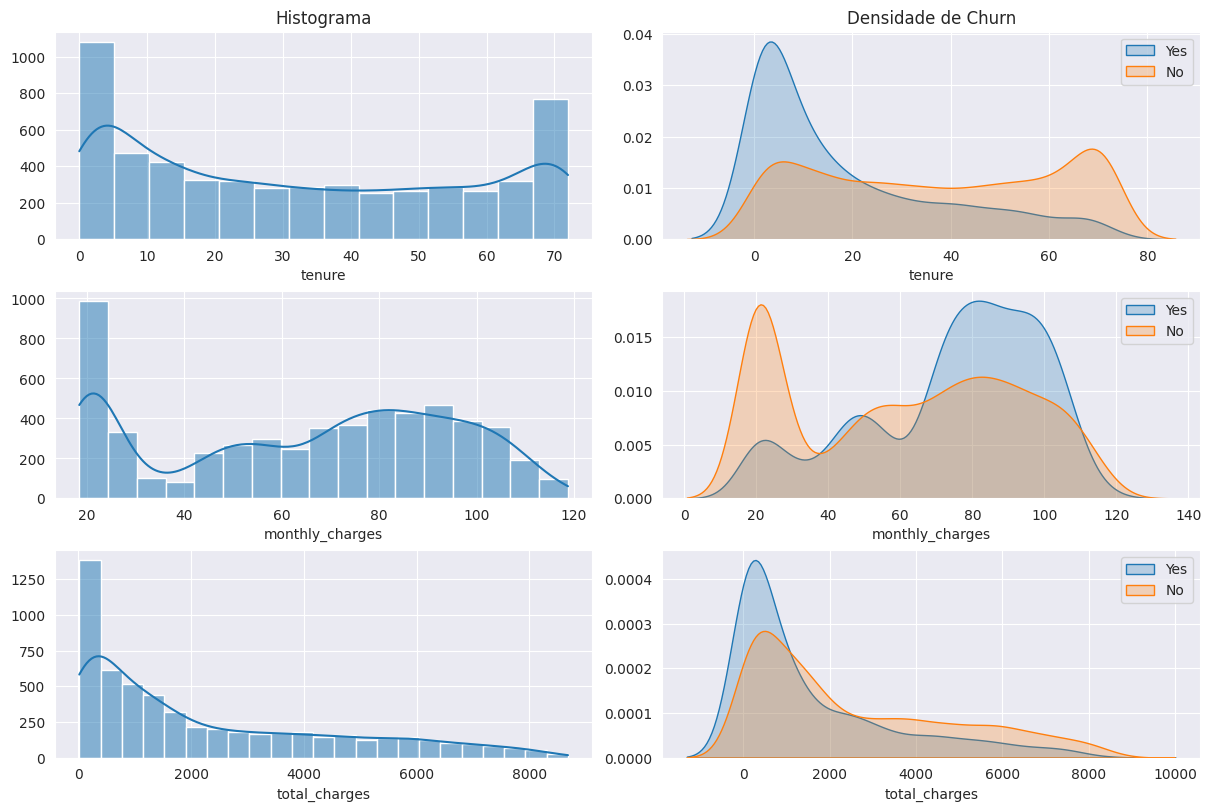

In [ ]:
# @title ##### **Distribuição das variáveis numéricas**

fig = plt.figure(layout='constrained', figsize=(12, 8))

gs = GridSpec(nrows=3, ncols=2, figure=fig)
ax1, ax2 = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]
ax3, ax4 = [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1:])]
ax5, ax6 = [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1:])]

# plotar histogramas das variáveis numéricas para churn = Yes
sns.histplot(data=numeric_var.tenure, kde=True, ax=ax1)
sns.histplot(data=numeric_var.monthly_charges, kde=True, ax=ax3)
sns.histplot(data=numeric_var.total_charges, kde=True, ax=ax5)

ax1.set_title('Histograma')

ax1.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)
ax5.yaxis.label.set_visible(False)

# separar as variaveis numéricas por Churn
churn_numeric_var = numeric_var[telco_train.churn == 'Yes']
no_churn_numeric_var = numeric_var[telco_train.churn == 'No']

# plotar histogramas das variáveis numéricas para churn = Yes e churn = No
sns.kdeplot(data=churn_numeric_var.tenure, label='Yes', fill=True, ax=ax2)
sns.kdeplot(data=no_churn_numeric_var.tenure, label='No', fill=True, ax=ax2)
ax2.legend()

sns.kdeplot(data=churn_numeric_var.monthly_charges, label='Yes', fill=True, ax=ax4)
sns.kdeplot(data=no_churn_numeric_var.monthly_charges, label='No', fill=True, ax=ax4)
ax4.legend()

sns.kdeplot(data=churn_numeric_var.total_charges, label='Yes', fill=True, ax=ax6)
sns.kdeplot(data=no_churn_numeric_var.total_charges, label='No', fill=True, ax=ax6)
ax6.legend()

ax2.yaxis.label.set_visible(False)
ax4.yaxis.label.set_visible(False)
ax6.yaxis.label.set_visible(False)

ax2.set_title('Densidade de Churn')

plt.show()

A visualização das distribuições forneceram alguns insights muito interessantes:

* A maioria dos casos de churn ocorrem entre o 1º e o 20º mês;
* Os casos de churn tendem a ser menor quando a cobrança mensal é entre US&#36; 20.00 e US&#36; 40.00, e maiores entre US&#36; 60.00 e US&#36; 120.00.


##### **Buscando outliers**

Também é interessante buscar por valores outliers nas variáveis, pois alguns modelo de machine learning podem ser mais sensíveis a outliers levando a resultados piores.

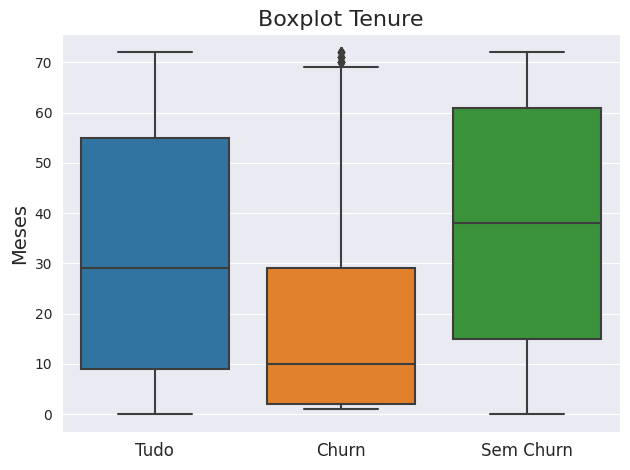

In [ ]:
# @title ##### **Boxplot Tenure**
# box plot da variável tenure
fig, ax = plt.subplots(1, 1)

ax.set_title('Boxplot Tenure', fontdict={'fontsize' : 16})
sns.boxplot([numeric_var.tenure, churn_numeric_var.tenure, no_churn_numeric_var.tenure], ax=ax)

ax.set_ylabel('Meses', fontdict={'fontsize' : 14})
ax.set_xticklabels(['Tudo', 'Churn', 'Sem Churn'], fontdict={'fontsize' : 12})

plt.tight_layout()

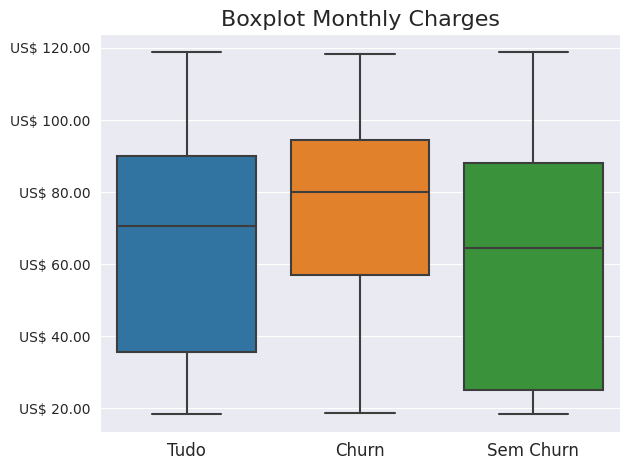

In [ ]:
# @title ##### **Boxplot Monthly Charges**
# box plot da variável monthly_charges
fig, ax = plt.subplots(1, 1)

ax.set_title('Boxplot Monthly Charges', fontdict={'fontsize' : 16})
sns.boxplot([numeric_var.monthly_charges, churn_numeric_var.monthly_charges, no_churn_numeric_var.monthly_charges], ax=ax)

ax.yaxis.set_major_formatter(lambda value, _: f'US$ {value:.2f}', )
ax.yaxis.get_major_ticks()[0].label1.set_fontsize(12)

ax.set_xticklabels(['Tudo', 'Churn', 'Sem Churn'], fontdict={'fontsize' : 12})

plt.tight_layout()

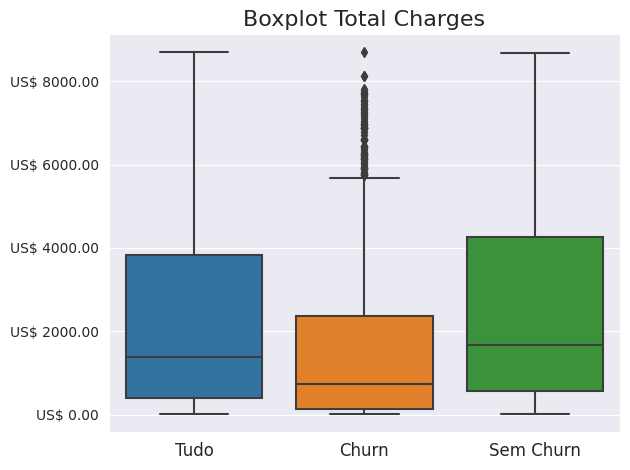

In [ ]:
# @title ##### **Boxplot Total Charges**
# box plot da variável total_charges
fig, ax = plt.subplots(1, 1)

ax.set_title('Boxplot Total Charges', fontdict={'fontsize' : 16})
sns.boxplot([numeric_var.total_charges, churn_numeric_var.total_charges, no_churn_numeric_var.total_charges], ax=ax)

ax.yaxis.set_major_formatter(lambda value, _: f'US$ {value:.2f}', )
ax.yaxis.get_major_ticks()[0].label1.set_fontsize(12)

ax.set_xticklabels(['Tudo', 'Churn', 'Sem Churn'], fontdict={'fontsize' : 12})

plt.tight_layout()

Os boxplots das variáveis `Tenure` e `Monthly Charges` não aparentam ter casos sérios de outliers (apesar de a variável Tenure apresentar outliers quando as instâncias são de churn, eles não se distanciam muito do 3 quartil (da barra superior)).

Porém, em relação à variável `Total Charges`, as instâncias com churn estão apresentando valores outliers. Por isso, posteriormente, estarei tratando esses valores.

#### **Variáveis categóricas**

Analisada as variáveis numéricas, vamos para as categóricas. Aqui teremos que usar métodos diferentes, pois a forma como lidamos com variáveis numéricas e categóricas é diferente.

In [ ]:
# filtrar as variáveis categóricas
cat_var_labels = [
  'gender', 'senior_citizen', 'partner', 'dependents',
  'phone_service', 'multiple_lines', 'internet_service', 'online_security',
  'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
  'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
  'churn'
]

# criar uma cópia das variáveis categóricas para não alterar os dados originais
cat_var = telco_train[cat_var_labels].copy()

# tratar cada tipo como categoria
for column in cat_var.columns:
  cat_var[column] = cat_var[column].astype('category')

# mostrar descrição estatísca das variáveis categóricas
display(cat_var.describe().T)

,count,unique,top,freq
gender,5634,2,Male,2833
senior_citizen,5634,2,0,4714
partner,5634,2,No,2905
dependents,5634,2,No,3955
phone_service,5634,2,Yes,5075
multiple_lines,5634,3,No,2685
internet_service,5634,3,Fiber optic,2483
online_security,5634,3,No,2797
online_backup,5634,3,No,2442
device_protection,5634,3,No,2472


In [ ]:
# função auxiliar para plotar os gráficos de barra para cada variável categórica
def plot_categorical_bar_graphs(df):
  fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

  fig.suptitle('Churn para diferentes variáveis categóricas\n', fontsize=20)

  for i in range(4):
    for j in range(4):
      sns.countplot(data=df, x='churn', hue=cat_var_labels[i * 4 + j], ax=axes[i, j])
      axes[i, j].set_xlabel('')

  plt.tight_layout()

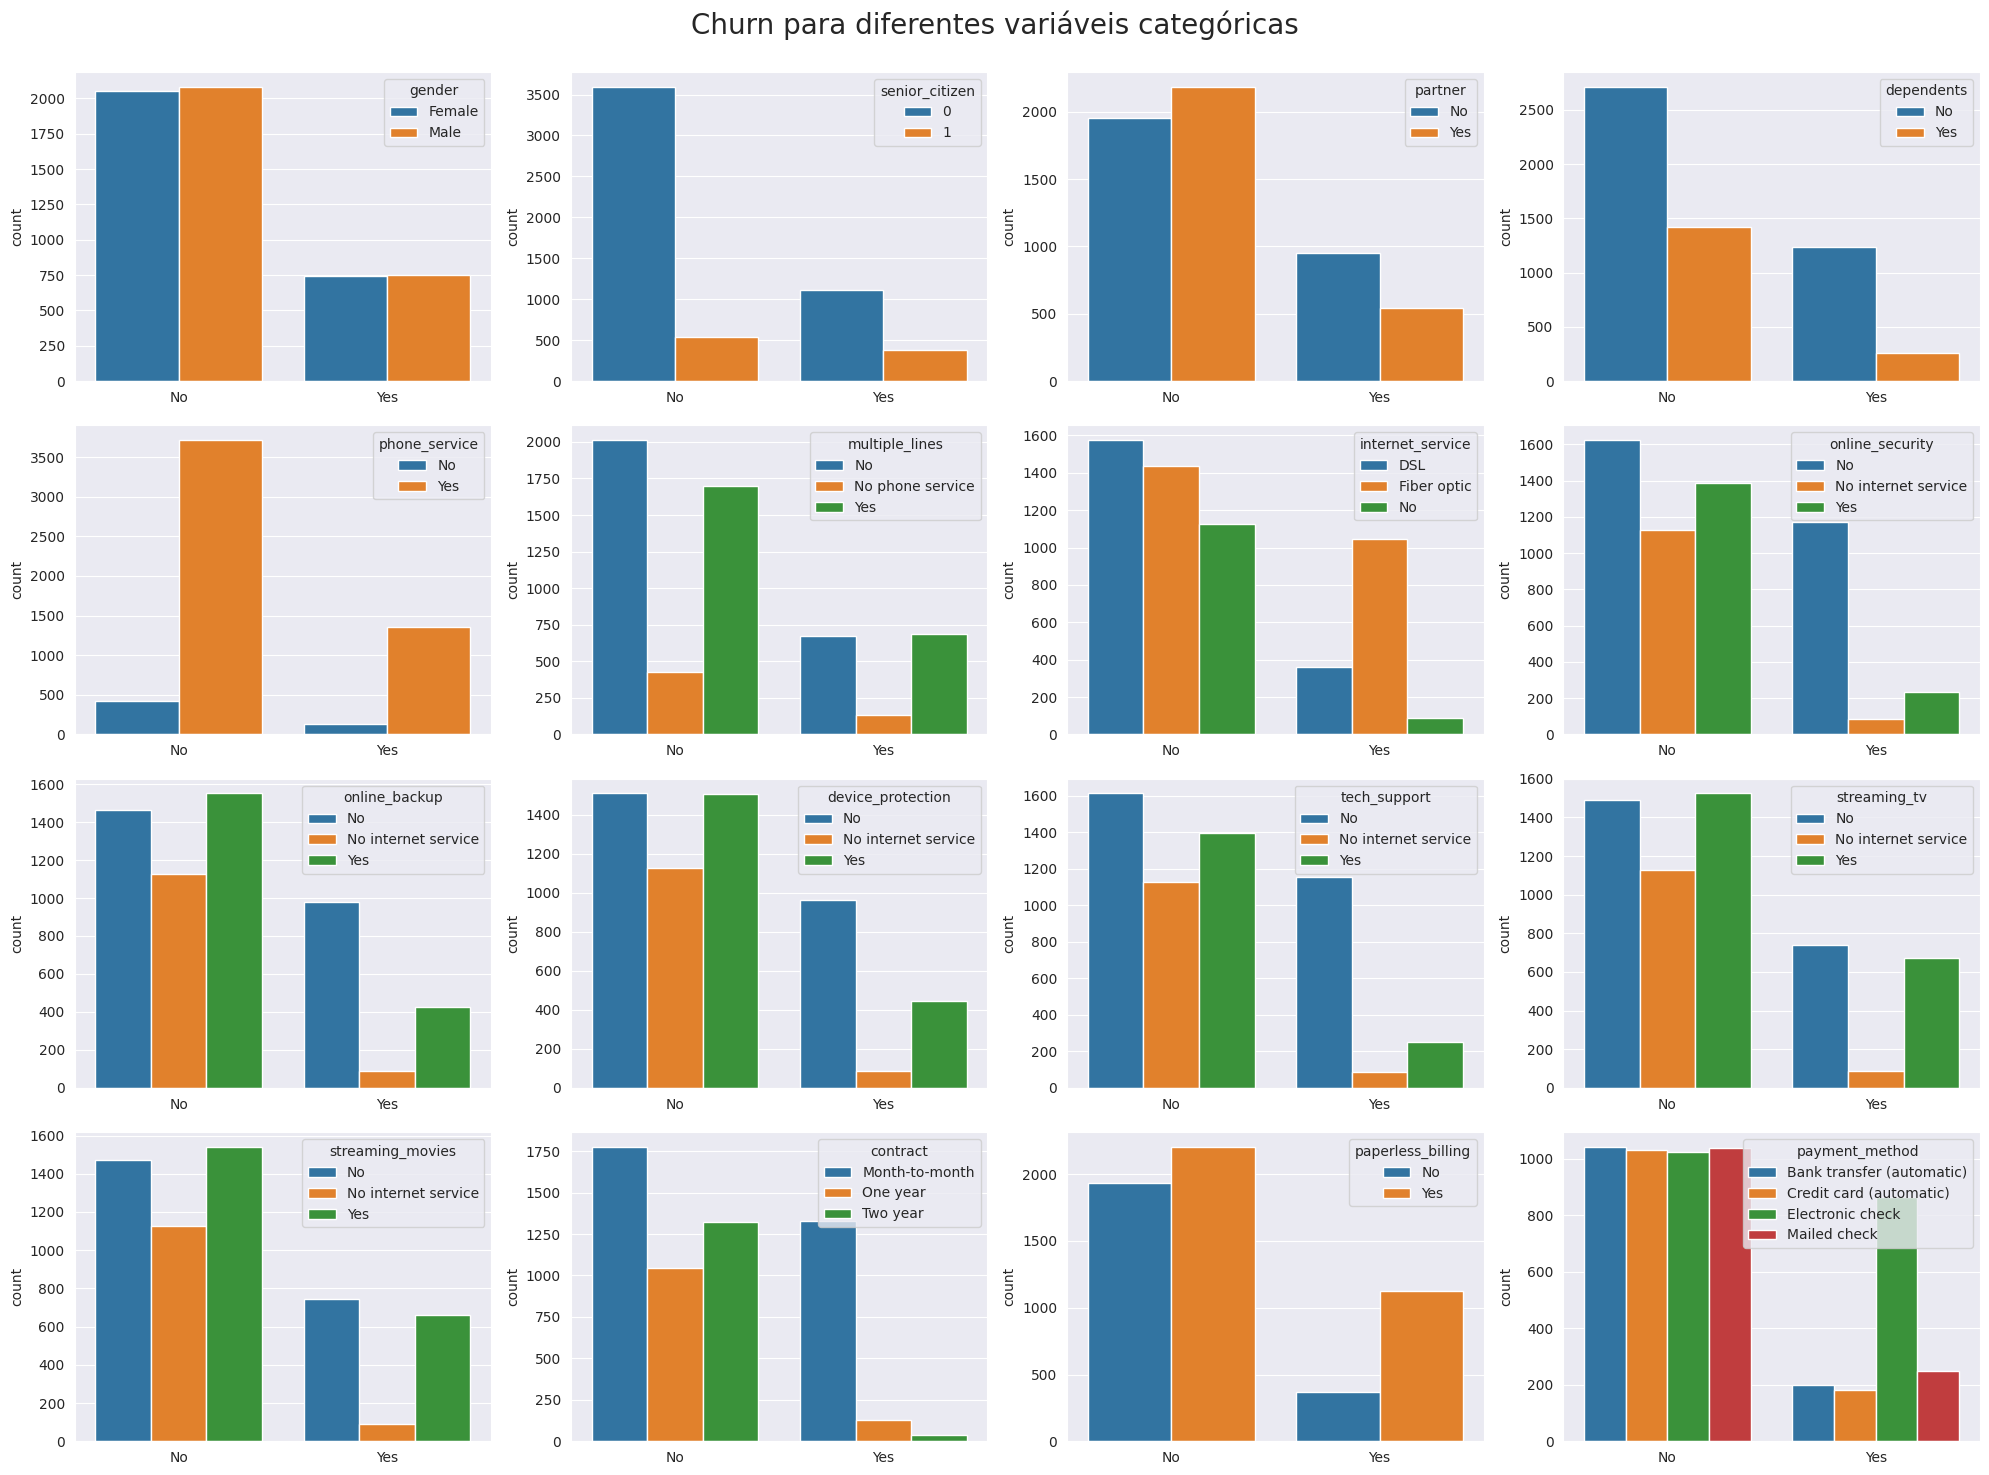

In [ ]:
plot_categorical_bar_graphs(cat_var)

Antes de descrever minhas observações, vou fazer uma alteração nos dados. Algumas categorias trazem informações redundantes, por exemplo: existe a categoria `internet_service`, e seus possíveis valores são `DSL`, `Fiber optic` e `No`, até aí tudo bem. Contudo, nas categorias seguintes encontramos opções como `No`, `No internet service` e `Yes`, mas como já temos em uma categoria a informação se o cliente assina um serviço de internet, podemos simplesmte dizer que para as outras categorias `No internet service` é o mesmo que `No`. E exatamente essa alteração que irei fazer, isso inclusive diminui a dimensionalidade de nossos dados (algo bom para os modelos de machine learning).

Dito isso, as categorias que modificarei serão: `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv` e `streaming_movies`.

Obs: apesar de parecer ter uma redundância entre as variáveis `phone_service` e `multiple_lines`, perceba que as opções para `multiple_lines` tem significados diferentes: quando o valor é `No`, entende-se que há apenas uma linha, já quando é `No phone service`, entende-se que não há nenhuma linha.

In [ ]:
def remove_redundant_info(df):
  df.online_security.replace('No internet service', 'No', inplace=True)
  df.online_backup.replace('No internet service', 'No', inplace=True)
  df.device_protection.replace('No internet service', 'No', inplace=True)
  df.tech_support.replace('No internet service', 'No', inplace=True)
  df.streaming_tv.replace('No internet service', 'No', inplace=True)
  df.streaming_movies.replace('No internet service', 'No', inplace=True)

# removendo dos dados redundantes
remove_redundant_info(cat_var)

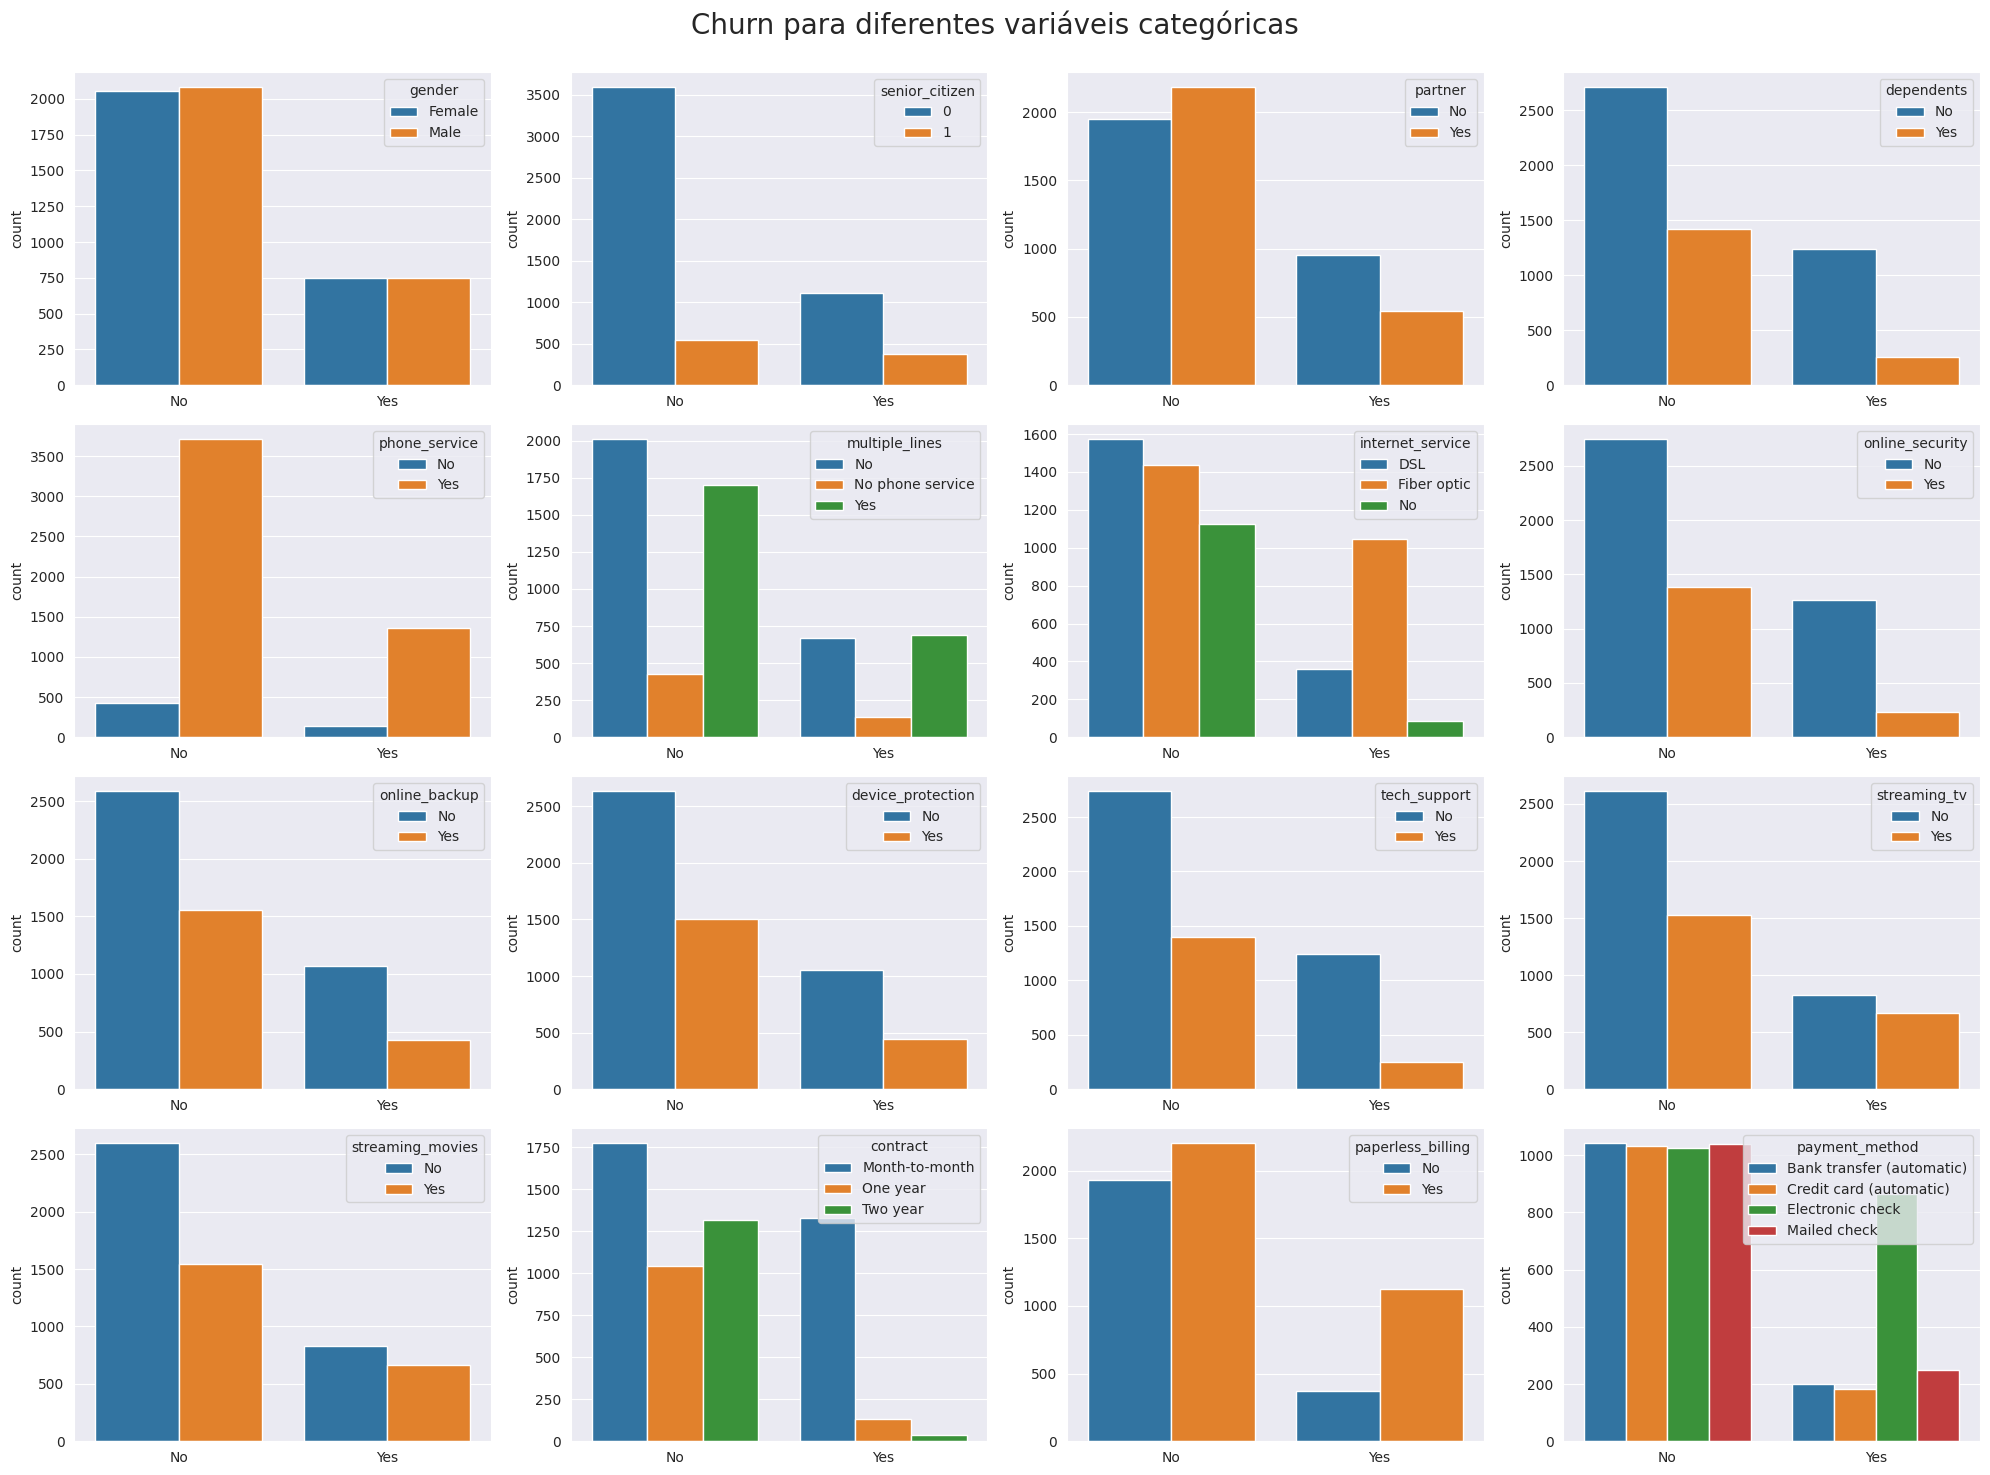

In [ ]:
plot_categorical_bar_graphs(cat_var)

Elencando os pontos mais relevantes, percebemos o seguinte:

* A variável de genêro está bem equilibrada, tanto para casos de churn quanto para casos normais

* A maioria dos clientes tem menos de 65 anos de idade

* A maioria dos clientes possuem algum tipo de dependente
* A maioria dos clientes assina o serviço telefônico

* A maioria dos clientes que deixaram a empresa assinavam o serviço de internet por fibra ótica

* A maioria dos clientes não assianam o serviço de segurança online, nem de backup online, nem de proteção de dispositivo e nem de suporte técnico

* A grande maioria dos clientes que deixaram o serviço, assinavam o contrato mês-a-mês

* A maior parte dos clientes preferem a cobrança sem papel

* A maioria dos clientes que deixaram o serviço, efetuavam o pagamento com cheque eletrônico

Além disso, vamos analisar o balancemanto da variável alvo. Pois se ela estiver desbalanceada, teremos que tomar algumas precauções para avaliar os modelos.

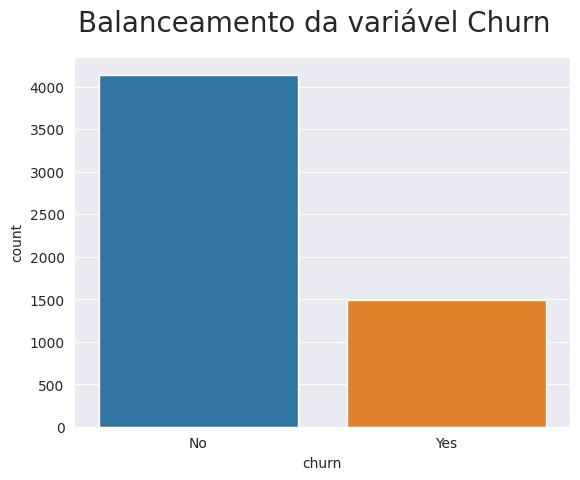

Porcentagem de Churn: 26.54%
Porcentagem de clientes que continuam: 73.46%


In [ ]:
# plotar gráfico de barras para variável churn
fig, ax = plt.subplots(nrows=1, ncols=1)

fig.suptitle('Balanceamento da variável Churn', fontsize=20)
sns.countplot(data=cat_var, x='churn', ax=ax)

plt.show()

# calcular e mostrar a porcentagem de churn
churn_percentage = cat_var[cat_var.churn == 'Yes'].churn.shape[0] / cat_var.churn.shape[0]
no_churn_percentage = cat_var[cat_var.churn == 'No'].churn.shape[0] / cat_var.churn.shape[0]

print(f'Porcentagem de Churn: {churn_percentage * 100:.2f}%')
print(f'Porcentagem de clientes que continuam: {no_churn_percentage * 100:.2f}%')

Como vemos acima, menos da metade dos dados são de clientes que abandonaram o serviço. Este desbalanceamento não é o desejado, por isso, na hora de escolhermos as métricas podemos optar por algumas mais resistentes a este desbalanceamento. Por exemplo, se usarmos apenas acurácia e classificarmos todos com baixa probabilidade de churn, teriamos uma precisão de 73,46%, dessa forma continuariamos perdendo muitos clientes mesmo com uma precisão alta. Outro ponto que podemos pensar é que, para nosso modelo ter uma performance interessante, ele deve ter uma precisão superior a 73,46% (isso indica que ele identifica casos de churn, e não somente os casos de baixa probabilidade).

### **Análise Estatística Bivariada**

Na análise bivariada buscamos estudar duas ou mais variáveis ao mesmo tempo. Meu objetivo agora é observar a correlação estre cada variável com a variável alvo. Além de testar algumas ideías de feature enginering.

#### **Matriz de correlação**

**Estarei usando uma matriz de correlação** que **consegue detectar correlações lineares** entre as variáveis. Um requisito para utilizar essa técnica é que os dados sejam todos numéricos. Considerando que nossas variáveis categóricas não possuem relação de ordem, estarei usando um método para substituir as categorias por números, dessa forma poderemos usar a matriz de correlação.

In [ ]:
# unir as variáveis numéricas e categóricas
all_vars = pd.concat([numeric_var, cat_var], axis=1)

# trocar as categorias por números
for column in cat_var_labels:
  all_vars[column] = pd.factorize(all_vars[column])[0]

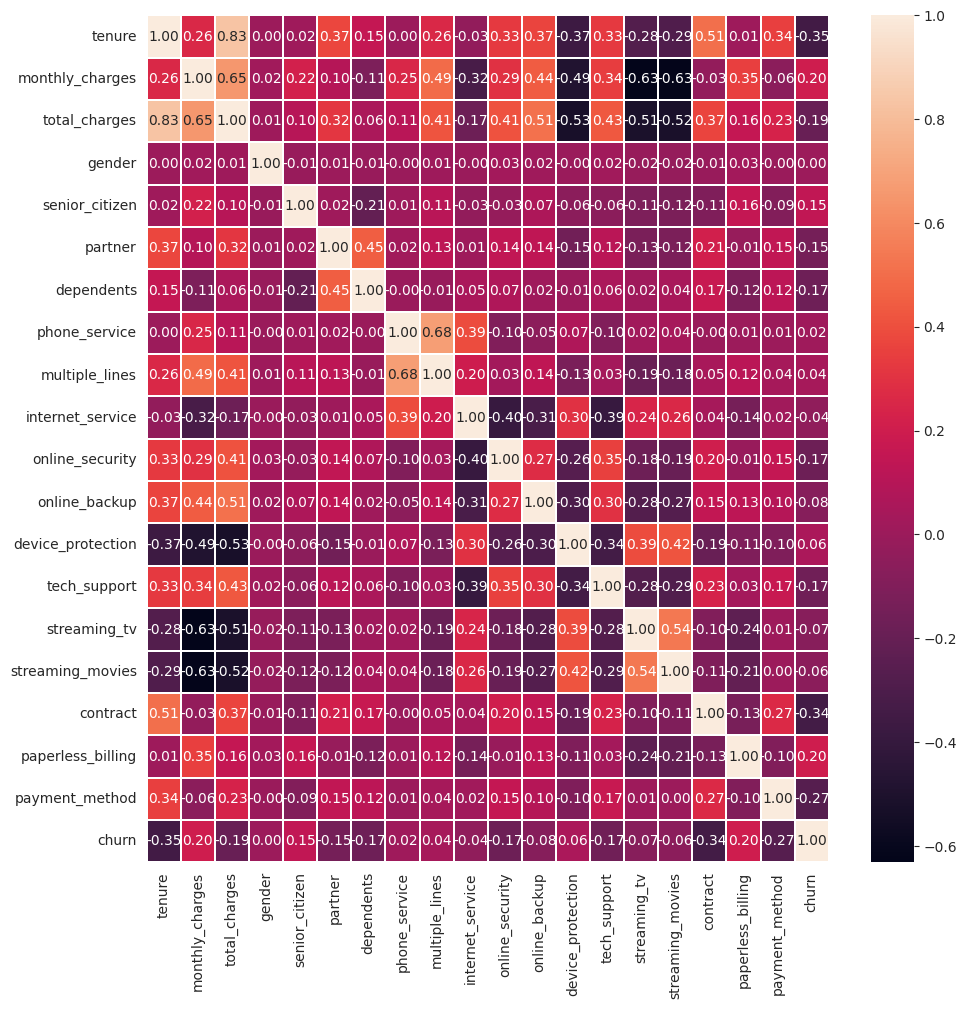

In [ ]:
# calcular a matriz de correlação
corr_mat = all_vars.corr()

# plotar a matriz
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data=corr_mat, annot=True, fmt='.2f', linewidths=.1, ax=ax)
plt.show()

Vamos nos atentar apenas à linha **`churn`** da matriz, e não esquecer que **correlação não implica em uma relação de causalidade**. Segue alguns insights:

* **`gender`** tem correlação 0 com churn. Isso faz sentido, pois ná análise univariada observamos um equilibrio entre as categoria dessa variável

* outras variáveis que aparentam ter **baixa relação** são: **`phone_service`**, **`multiple_lines`** e **`internet_service`**

* as variáveis com **maior correlação** são: **`tenure`**, **`online_security`**, **`online_backup`**, **`tech_support`**, **`contract`** e **`payment_method`**

* **`montlhy_carges`** e **`tenure`** possuem uma correlação alta com **`total_carges`**. Isso é uma indicação forte de multicolinearidade, que é ruim para os modelos de machine learning

Feitas essas considerações, decidi por decartar as variáveis:

 * `gender`, por não ter correlação nehuma e por estar bem balanceada

 * `total_charges`, por causa das evidências de multicolinearidade. E para reforçar essa idéia, visualize o gráfico **`tenure/monthly_charges vs total_charges`**, onde podemos perceber uma certa linearidade entre as variáveis (conforme tenure/monthly_charges sobem, total_charges também)

#### **Tenure/Monthly Charges vs Total Charges**

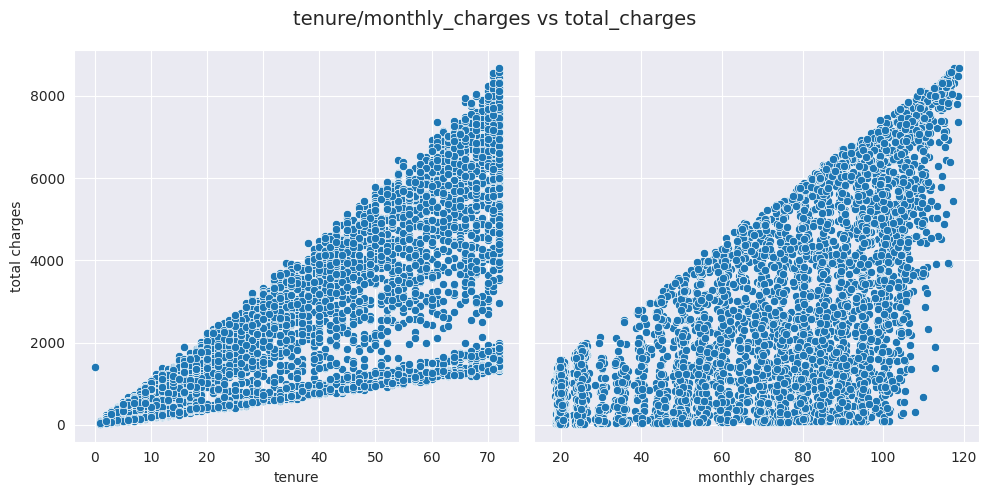

In [ ]:
# scatter plot das variáveis tenure/monthly_charges vs total_charges
fig, (ax0 ,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

fig.suptitle('tenure/monthly_charges vs total_charges', fontsize=14)

sns.scatterplot(data=all_vars, x='tenure', y='total_charges', ax=ax0)
sns.scatterplot(data=all_vars, x='monthly_charges', y='total_charges', ax=ax1)

ax0.set_xlabel('tenure')
ax0.set_ylabel('total charges')

ax1.set_xlabel('monthly charges')
ax1.set_ylabel('')
ax1.set_yticklabels([])

plt.tight_layout()

#### **Montlhy charge VS Tenure**

Aqui estarei plotando as variáveis `monthly_charges` e `tenure` para visualizar se há alguma relação valiosa entre elas.

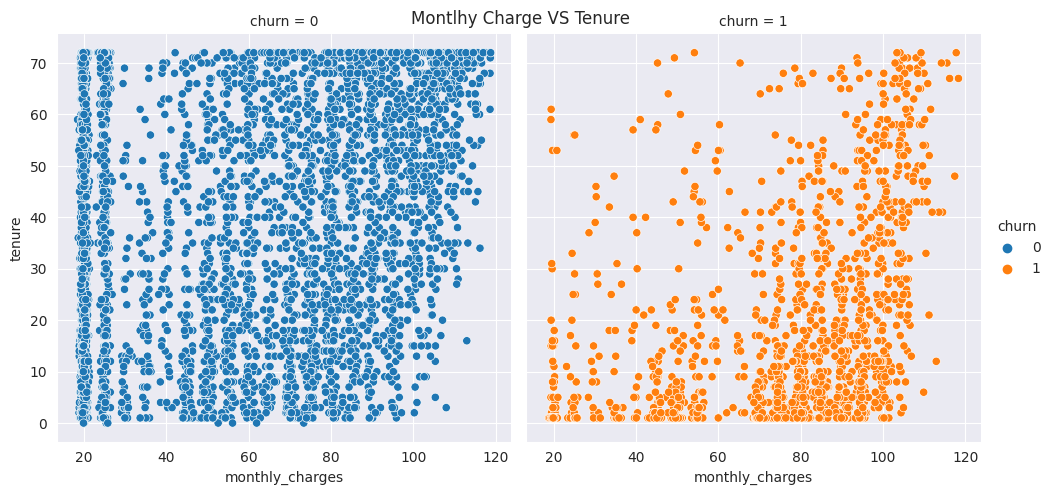

In [ ]:
rel = sns.relplot(
    data=all_vars,
    x='monthly_charges', y='tenure',
    col='churn',
    hue='churn',
    kind='scatter'
)

rel.fig.suptitle('Montlhy Charge VS Tenure', fontweight='medium')

plt.show()

Observando as plotagens acima, perceba como parece haver uma separação entre os casos de churn e não-churn (os casos com churn se concentram mais na região à direita e inferior).

Oque podemos inferir daqui é: **clientes com tenure baixo** (pouco tempo no serviço) **e alto montlhy_charge** (maior combrança mensal), **tem mais chances de abandonar o serviço**.

#### **Criando novas features**

Com todos os insights adquiridos na ánalise até agora, podemos pensar em algumas novas features.

**4 insights se destacam, sendo eles:**

* A maioria dos casos de churn ocorrem entre o 1º e o 20º mês

* Os casos de churn são maiores entre US&#36; 60.00 e US&#36; 120.00 de cobrança mensal

* A grande maioria dos clientes que deixaram o serviço, assinavam o contrato mês-a-mês

* Clientes com tenure baixo e alto montlhy_charge, tem mais chances de abandonar o serviço

**Por isso sugiro a crianção de variáveis que indicam:**
* se o cliente está assinando o serviço a menos de 2 anos (2 anos são 24 meses, que é muito próximo de 20 meses)

* se a cobrança mensal é superior a 60 dólares

* se o cliente assina mês-a-mês

* a cobrança mesal pelo tempo de assinatura (montlhy_charge / tenure)

In [ ]:
def create_features(df):
  df['less_than_2_years'] = df.tenure < 24
  df['charge_over_60'] = df.monthly_charges > 60.0
  df['month_to_month_contract'] = (df.contract == 'Month-to-month') | (df.contract == 0)
  df['month_charge_per_tenure'] = df.monthly_charges / df.tenure.apply(lambda x: 1 if x == 0 else x)

# criando as novas features
create_features(all_vars)

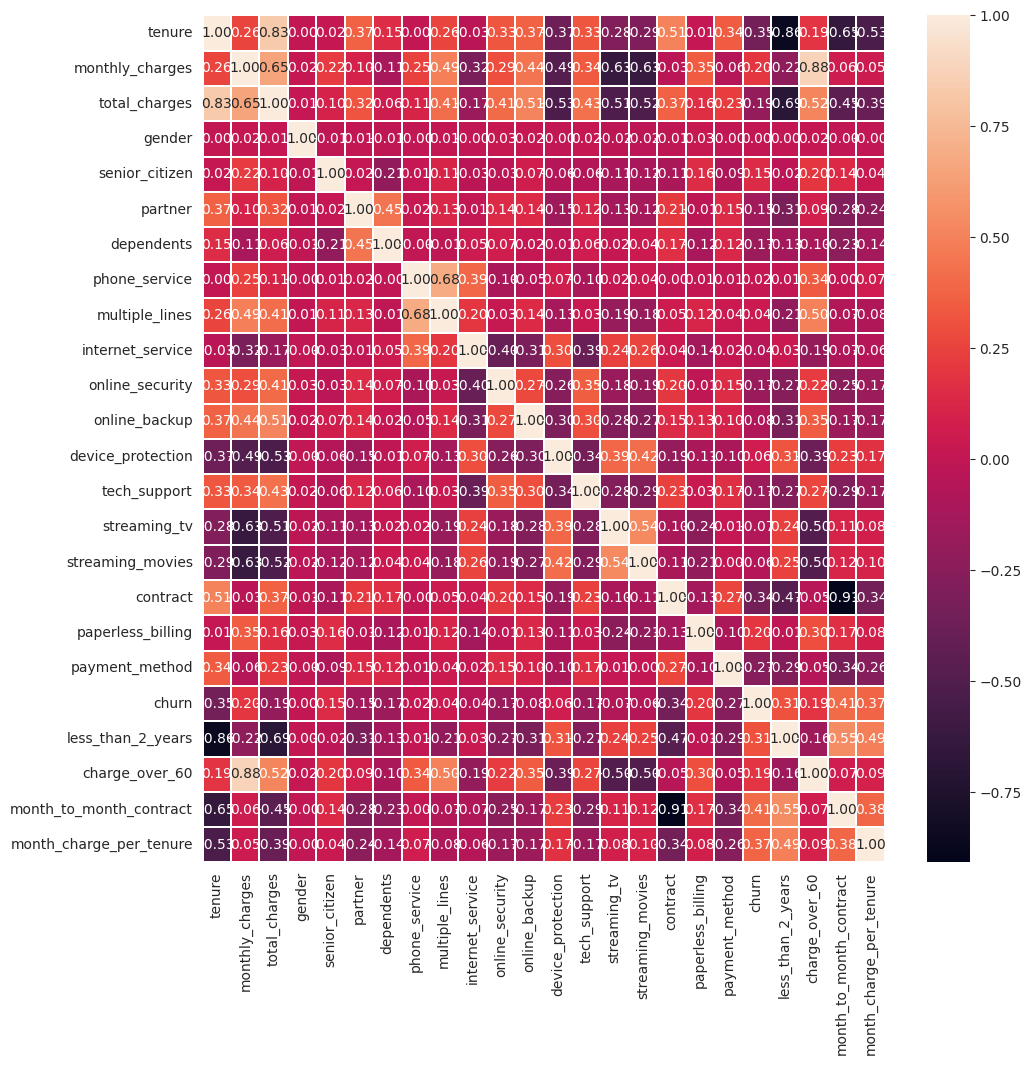

In [ ]:
# visualizar a matriz de correlção novamente
corr_mat = all_vars.corr()
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data=corr_mat, annot=True, fmt='.2f', linewidths=.1, ax=ax)
plt.show()

* As duas novas variáveis, **`less_than_2_years`** e **`charge_over_60`** apresentam relações semelhantes à **`tenure`** e **`monthly_charges`**(de onde elas derivam).

* A variável **`month_to_month_contract`** consegui se sair melhor que a variável **`contract`** sozinha.

* E por fim, a variável **`month_charge_per_tenure`** conseguiu uma relação um pouco melhor que **`tenure`** e **`monthly_charges`**.

Feitas as consiferações, vamos selecionar apenas as features com correlação supeior a 0.15 ou inferior a -0.15. São elas (desconsiderando total_charges e genure):

* `tenure`
* `monthly_charges`
* `senior_citzen`
* `partner`
* `dependents`
* `online_security`
* `tech_support`
* `contract`
* `paperless_billing`
* `payment_method`
* `less_than_2_years`
* `charge_over_60`
* `month_to_month_contract`
* `month_charge_per_tenure`

Algumas variáveis possui uma correlação muito alta entre si, são elas:

* `month_to_month_contract` e `contract`
* `less_than_2_years` e `tenure`
* `charge_over_60` e `monthly_charges`

Isso nos dá um indício muito alto de multicolinearidade, portanto usarei as variáveis que deram maior correlação com a variável alvo, são elas:

* `month_to_month_contract`
* `tenure`
* `monthly_charges`

# **3. Preparação dos dados**

Agora que temos um bom entendimento dos dados, vamos prepará-los para os modelos de machine learning.

## **Transformando os dados**

Mencionei antes, que iria lidar com os valores outlier da variável `total_charges`, mas como vou descartá-la, posso pular esta etapa. Dessa forma nos resta:

* Separar os dados em X e y

* Cirar as variáveis novas

* Transformar as variáveis categóricas usando One-hot encoding, pois no formato atual elas não se encaixam nos modelos

* Aplicar escalonamento nos dados, para deixa-los em uma escala comum

In [ ]:
# funções para auxiliar a preparação de dados

def prepare_data(df):
  # separar os dados em X e y
  X, y = df.iloc[:, :-1].copy(), df.iloc[:, -1].copy()

  # tratar as categorias redundantes
  remove_redundant_info(X)

  # criar as variáveis novas
  X['month_to_month_contract'] = X.contract == 'Month-to-month'
  X['month_charge_per_tenure'] = X.monthly_charges / X.tenure.apply(lambda x: 1 if x == 0 else x)

  # dropar variáveis não usadas
  X.drop(['customer_id',
          'gender',
          'total_charges',
          'phone_service',
          'multiple_lines',
          'internet_service',
          'online_backup',
          'device_protection',
          'streaming_tv',
          'streaming_movies',
          'contract'
          ], axis=1, inplace=True)

  return X, y

def transform_data(X, y):
  cat_var_columns = [
    'partner', 'dependents', 'online_security',
    'tech_support', 'paperless_billing', 'payment_method',
    'month_to_month_contract'
  ]

  num_var_columns = ['tenure', 'monthly_charges', 'month_charge_per_tenure']

  # aplicar encode e escalonamento
  ct = ColumnTransformer(
      transformers=[
          ('encode', OneHotEncoder(), cat_var_columns),
          ('scaler', StandardScaler(), num_var_columns)
      ],
      remainder='passthrough'
  )

  # encode y label
  le = LabelEncoder()
  le.fit(['No', 'Yes'])

  return ct, ct.fit_transform(X), le, le.transform(y)

In [ ]:
X, y = prepare_data(telco_train)

In [ ]:
ct, X, le, y = transform_data(X, y)

# **4. Modelagem**

## **Definindo a métrica**

Como visto anteriormente, a variável alvo esta desbalanceada, tornando a acurácia uma métrica 'fraca' para nosso problema. Por isso, precisamos adotar outra métrica para orientar na escolha dos modelos.

Alguns pontos que temos que levar em consideração:

* Não temos noção de qual será o custo que a empresa terá para manter os clientes com alta probabilidade de churn

* Caso o custo seja alto e nosso modelo consiga prever a maioria dos casos de churn mas com baixa precisão, isso levaria a um gasto desnecessário para a empresa

* Nesse mesma idéia do ponto anterior, se nosso modelo prever alguns casos de churn mas com alta precisão, a empresa teria um gasto menor, porém acabaria perdendo muitos clientes

Feitas as considerações, queremos um modelo encontre a maioria dos de churn mas sem perder muita precisão. Considerando que a classe alvo é mais rara(devido ao desbalanceamento), uma forma de avaliar os melhores modelos é por meio da análise da curva PR, que leva em conta precisão e revocação, por isso o nome PR. Em conjunto, podemos utilizar a métrica AUC, que computa a área sob a curva (no caso a curva PR), de forma que, quanto mais próximo de 1, melhor a relação entre precisão e revocação, oque se encaixa perfeitamente no problema.

Além disso, utilizando a curva PR, podemos regular os limiares de probabilidade para aumentar a precisão ou a revocação.

## **Testando Modelos**

Para uma tarefa de classificação binária, podemos explorar os seguintes modelos:

* Logistic Regression
* Support Vector Machine (SVM)
* Nearest Neighbors
* Random Forest
* Xgboost

Antes de testar os modelos, vou dividir os dados em treino e validação. Dessa forma consigo fazer um teste nos modelos com os dados de validação para selecionar o melhor, e depois testar nos dados de teste.

In [ ]:
# dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# visualizar porcentagem da variável alvo após o split
print(f'Treino: {(y_train == 1).sum() / len(y_train) * 100:.2f}% de churn')
print(f'Validação: {(y_val == 1).sum() / len(y_val) * 100:.2f}% de churn')

Treino: 26.54% de churn
Validação: 26.53% de churn


In [ ]:
# funções para visualizar métricas e tunar modelos

def plot_pr_vs_limiars(precisions, recalls, limiars, precisions_val, recalls_val, limiars_val, ax):
  # calcular intersecção
  intersection_idx = np.argmin(np.abs(precisions - recalls))
  intersection_limiar = limiars[intersection_idx]
  intersection_recall = recalls[intersection_idx]

  # plotar gráfico
  ax.set_title('Precisão/Revocação vs Limiar')

  ax.plot(limiars, precisions, label='Precisão')
  ax.plot(limiars, recalls, label='Revocação')

  ax.plot(limiars_val, precisions_val, label='Precisão_Cross_Val', alpha=0.2)
  ax.plot(limiars_val, recalls_val, label='Revocação_Cross_Val',  alpha=0.2)

  # plotar o ponto de intersecção
  ax.scatter(intersection_limiar, intersection_recall, color='red', marker='o', label='Intersecção')

  ax.annotate(f'Limiar: {intersection_limiar:.3f}',
             xy=(intersection_limiar, intersection_recall),
             xytext=(intersection_limiar + 0.2, intersection_recall - 0.1),
             arrowprops=dict(color='red', lw=1.5, arrowstyle='->'))

  ax.legend(loc='lower left')
  ax.set_xlabel('Limiar')

def plot_pr_curve(precisions, recalls, precisions_val, recalls_val, ax):
  # calcular a area sob a curva
  area_under_curve = auc(recalls, precisions)

   # plotar a curva
  ax.plot(recalls, precisions)
  ax.fill_between(recalls, precisions, alpha=0.4)

  ax.plot(recalls_val, precisions_val, label='Cross_Val', alpha=0.5)

  # configuarar plot
  ax.set_title('Curva PR')
  ax.set_xlabel('Revocação')
  ax.set_ylabel('Precisão')
  ax.set_ylim(0, 1)
  ax.set_xlim(0, 1)
  ax.legend(loc='upper right')

  # anotar score
  ax.annotate(
      f'AUC: {area_under_curve:.2f}',
      xy=(0.1, 0.1),
      color='#ffffff',
      fontsize=14,
      fontweight='semibold')

def plot_confusion_matrix(title, y_true, y_pred, ax):
  # montar a matriz de confusão
  conf_mat = confusion_matrix(y_true, y_pred)

  # normalizar matriz
  norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

  # plotar a matriz
  sns.heatmap(norm_conf_mat, square=True, annot=True, cbar=False, ax=ax)

  # configuarar plot
  ax.set_title(title)
  ax.set_xlabel('Previsão do modelo')
  ax.set_ylabel('Valor verdadeiro')

def plot_classification_report(y_true, y_pred, ax):
  class_report = classification_report(y_true, y_pred, target_names=['No', 'Yes'], digits=5)

  # montar tabela de classification_report
  report_lines = class_report.split('\n')
  report_columns = [''] + report_lines[0].split()
  report_data = [[line.split()[0]] + list(line.split()[1:]) for line in report_lines[2:4]]
  report_data = report_data + [[''] * len(report_columns)]
  report_data = report_data + [['accuracy', '', ''] + list(report_lines[5].split()[1:])]
  report_table = [report_columns] + report_data

  # plotar tabela
  ax.axis('off')
  table = ax.table(cellText=report_table, loc='center', cellLoc='right', colWidths=[0.25] * len(report_columns))
  table.set_fontsize(12)
  table.scale(0.7, 1.2)

  for _, cell in table.get_celld().items():
    cell.set_linewidth(0)

def plot_metrics(y_true, y_pred_scores, y_val_scores, limiar):
  # calcular métricas
  y_pred = y_pred_scores >= limiar
  y_val = y_val_scores >= limiar

  precisions, recalls, limiars = precision_recall_curve(y_true, y_pred_scores)
  precisions_val, recalls_val, limiars_val = precision_recall_curve(y_true, y_val_scores)

  # configurar plot
  fig = plt.figure(layout='constrained', figsize=(11, 9))
  fig.suptitle('Métricas', fontsize=16)

  # layout do plot
  gs = GridSpec(nrows=5, ncols=4, figure=fig)
  ax0 = fig.add_subplot(gs[0:2, 0:2])
  ax1 = fig.add_subplot(gs[0:2, 2:])
  ax2 = fig.add_subplot(gs[2:4, 0:2])
  ax3 = fig.add_subplot(gs[2:4, 2:])
  ax4 = fig.add_subplot(gs[4, 0:2])
  ax5 = fig.add_subplot(gs[4, 2:])

  # plotar gráficos
  plot_pr_vs_limiars(precisions[:-1], recalls[:-1], limiars, precisions_val[:-1], recalls_val[:-1], limiars_val, ax0)
  plot_pr_curve(precisions[:-1], recalls[:-1], precisions_val[:-1], recalls_val[:-1], ax1)

  plot_confusion_matrix('Treino', y_true, y_pred, ax2)
  plot_confusion_matrix('Cross-Val', y_true, y_val, ax3)

  plot_classification_report(y_true, y_pred, ax4)
  plot_classification_report(y_true, y_val, ax5)

  plt.show()

def validate_model(model, X, y, limiar=0.5):
  # treinar modelo
  model.fit(X, y)
  y_pred_probas = model.predict_proba(X)

  # validação cruzada com stratified fold
  y_val_probas = cross_val_predict(
      model,
      X,
      y,
      cv=StratifiedKFold(10, shuffle=True, random_state=42),
      method='predict_proba')

  # scores
  y_pred_scores = y_pred_probas[:, 1]
  y_val_scores = y_val_probas[:, 1]

  plot_metrics(y, y_pred_scores, y_val_scores, limiar)

def tune_model(model, parameters, X, y):
  pr_auc_score = make_scorer(average_precision_score, greater_is_better=True, needs_proba=True)

  # efetuar grid search
  grid_search = GridSearchCV(
    model,
    parameters,
    scoring=pr_auc_score,
    cv=StratifiedKFold(10, shuffle=True, random_state=42),
    n_jobs=-1)

  grid_search.fit(X, y)

  # mostrar valores do melhor modelo
  print('Melhores parâmetros:', grid_search.best_params_)
  print(f'Score: {grid_search.best_score_:.2f}')

  return grid_search

### **Logistic Regression**

#### 1. Tunando Modelo

In [ ]:
# parametros de logistc regression
lr_params = [
    {
      'C' : [0.11, 0.12, 0.13, 0.14, 0.15],
      'solver' : ['lbfgs', 'newton-cg', 'sag'],
      'fit_intercept' : [True, False],
      'class_weight' : [None, 'balanced']
    },
    {
      'C' : [0.11, 0.12, 0.13, 0.14, 0.15],
      'solver' : ['liblinear'],
      'penalty' : ['l1', 'l2'],
      'fit_intercept' : [True, False],
      'class_weight' : [None, 'balanced']
    },
    {
      'solver' : ['saga'],
      'penalty' : [None, 'l1', 'l2'],
      'C' : [0.11, 0.12, 0.13, 0.14, 0.15],
      'fit_intercept' : [True, False],
      'class_weight' : [None, 'balanced'],
      'max_iter' : [2000]
    }
]

# tunando modelo
lr_search = tune_model(LogisticRegression(random_state=42), lr_params, X_train, y_train)
best_lr_model = lr_search.best_estimator_

Melhores parâmetros: {'C': 0.13, 'class_weight': None, 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}
Score: 0.66


#### 2. Métricas do Modelo

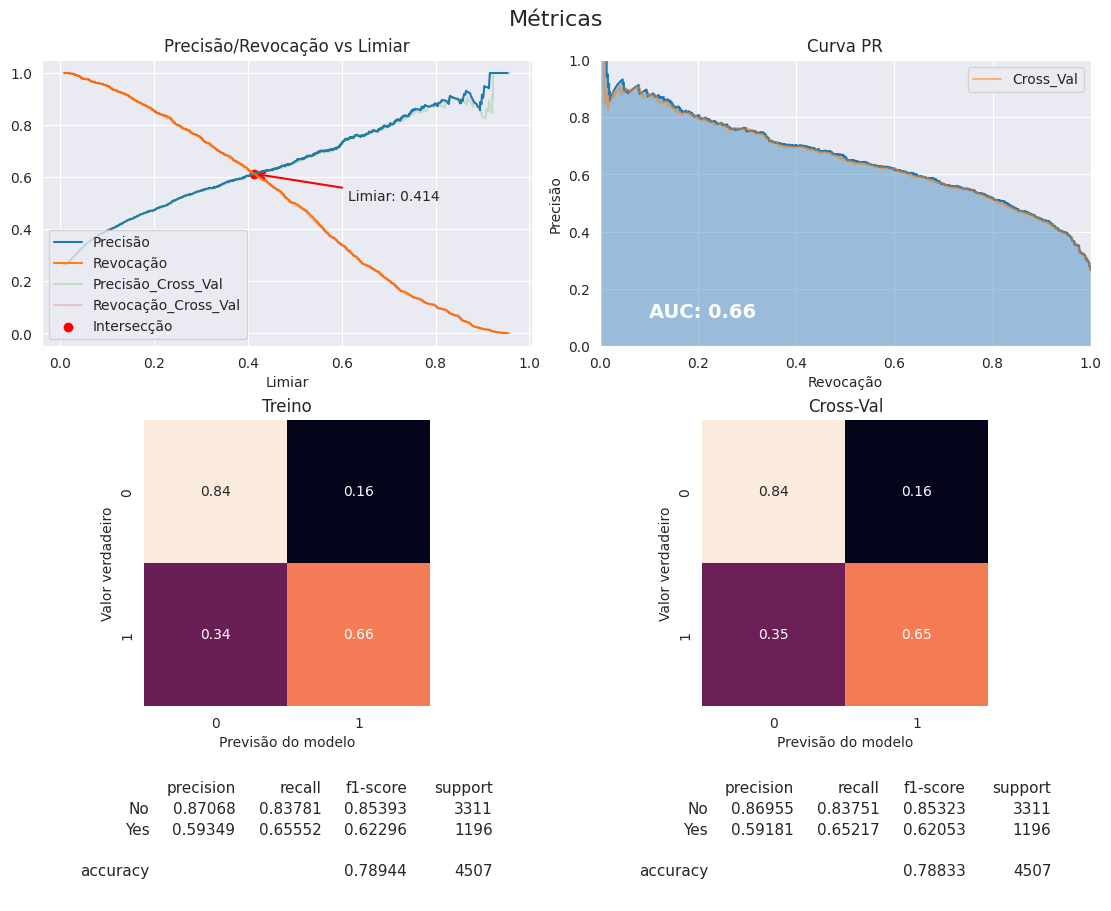

In [ ]:
# visualizar métricas do modelo
validate_model(best_lr_model, X_train, y_train, limiar=0.38)

#### 3. Conclusão

Observações do modelo:

* com limiar de 0.38, recall é aproximadamente 0.06 maior que precision
* **acurácia de 78%**
* evidência de **overfitting bem baixa**
* reconhece entre **65% e 66% dos casos de churn corretamente**
* não reconhece entre 34% e 34% dos casos de churn
* reconhece corretamente **84% dos casos de não-churn**
* **melhor limiar: 0.38**

### **Support Vector Machine**

#### 1. Tunando Modelo

In [ ]:
# parametros para tunar svc
svc_params = [
    #{
    #  'C' : [0.08, 0.09, 0.1],
    #  'kernel' : ['linear', 'rbf', 'sigmoid'],
    #  'class_weight' : ['balanced'],
    #  'shrinking' : [True, False]
    #},
    {
      'kernel' : ['poly'],
      'degree' : [1, 2],
      'C' : [0.07, 0.08],
      'class_weight' : ['balanced'],
      'shrinking' : [True, False]
    }
]
# tunando o modelo
svc_search = tune_model(SVC(probability=True, random_state=42), svc_params, X_train, y_train)
best_svc_model = svc_search.best_estimator_

Melhores parâmetros: {'C': 0.08, 'class_weight': 'balanced', 'degree': 1, 'kernel': 'poly', 'shrinking': True}
Score: 0.66


#### 2. Métricas do Modelo

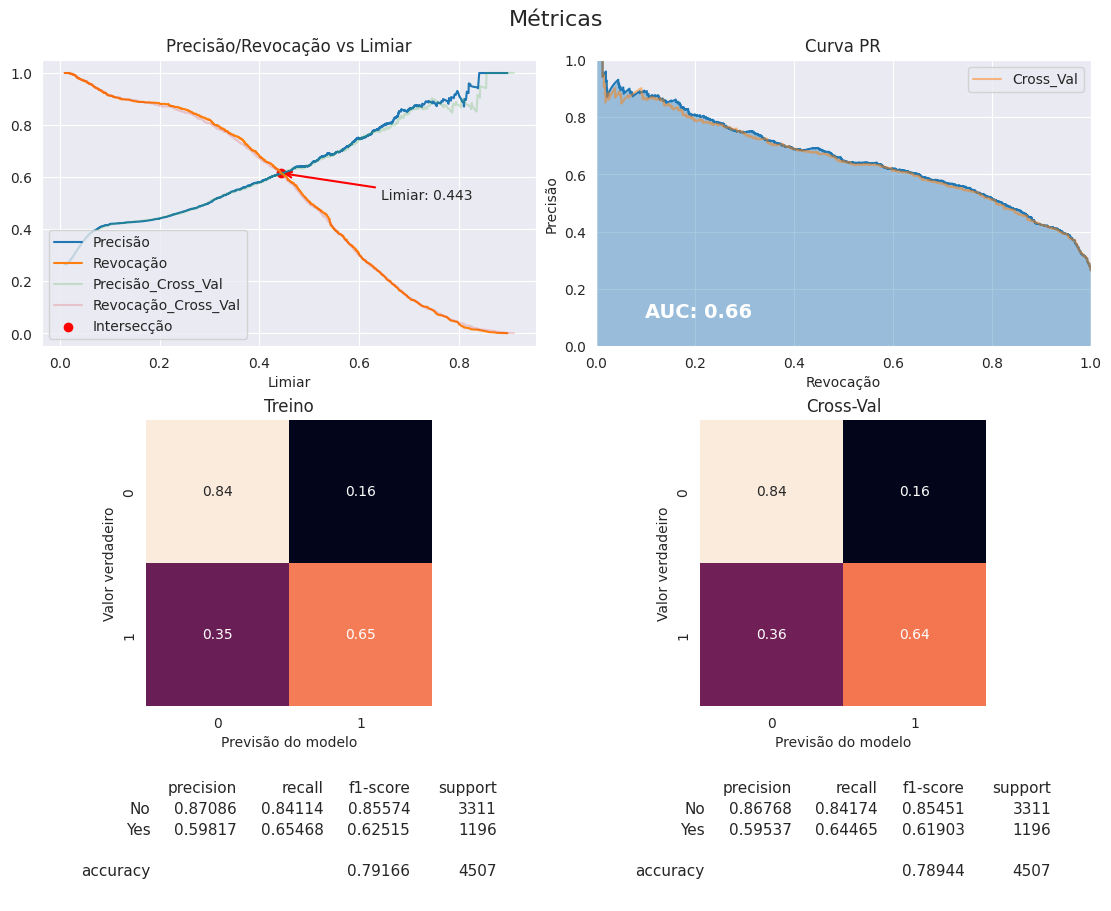

In [ ]:
# visualizar métricas do modelo
validate_model(best_svc_model, X_train, y_train, 0.42)

#### 3. Conclusão

Observações do modelo:

* com limiar de 0.42, recall é maior que precision
* **acurácia de 79%**
* evidência de **overfitting bem baixa**
* reconhece entre **64% e 65% dos casos de churn corretamente**
* não reconhece entre 35% e 36% dos casos de churn
* reconhece corretamente **84% dos casos de não-churn**
* **melhor limiar: 0.42**

### **Nearest Neighbors**

#### 1. Tunando Modelo

In [ ]:
# parametros para tunar knn
knn_params = {
    'n_neighbors' : [74, 75, 76],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2],
    'metric' : ['minkowski', 'euclidean', 'l1', 'l2']
}

# tunando o modelo
knn_search = tune_model(KNeighborsClassifier(), knn_params, X_train, y_train)
best_knn_model = knn_search.best_estimator_

Melhores parâmetros: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 75, 'p': 1}
Score: 0.64


#### 2. Métricas do Modelo

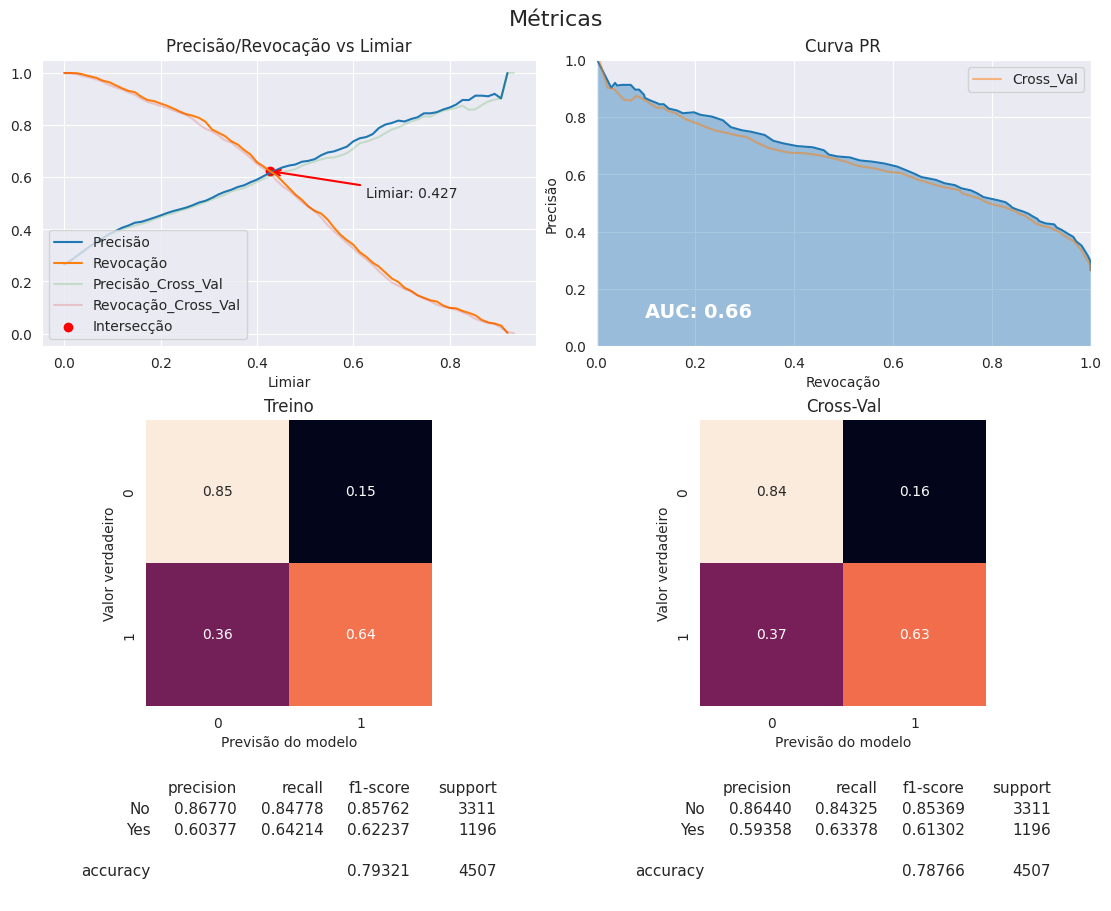

In [ ]:
# visualizar métricas do modelo
validate_model(best_knn_model, X_train, y_train, 0.41)

#### 3. Conclusão

Observações do modelo:

* com limiar de 0.41, recall é maior que precision
* **acurácia entre 78% e 79%**
* evidência de **overfitting baixa**
* reconhece entre **63% e 64% dos casos de churn corretamente**
* não reconhece entre 36% e 37% dos casos de churn
* reconhece corretamente entre **84% e 85% dos casos de não-churn**
* **melhor limiar: 0.41**

### **Random Forest**

#### 1. Tunando Modelo

In [ ]:
# parametros para tunar random forest
rf_params = {
  'n_estimators' : [98, 99, 100],
  'criterion' : ['gini', 'entropy', 'log_loss'],
  'max_depth' : [3, 4, 5],
  'bootstrap' : [True],
  'class_weight' : ['balanced']
}

# tunando o modelo
rf_search = tune_model(RandomForestClassifier(random_state=42, n_jobs=-1), rf_params, X_train, y_train)
best_rf_model = rf_search.best_estimator_

Melhores parâmetros: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 99}
Score: 0.65


#### 2. Métricas do Modelo

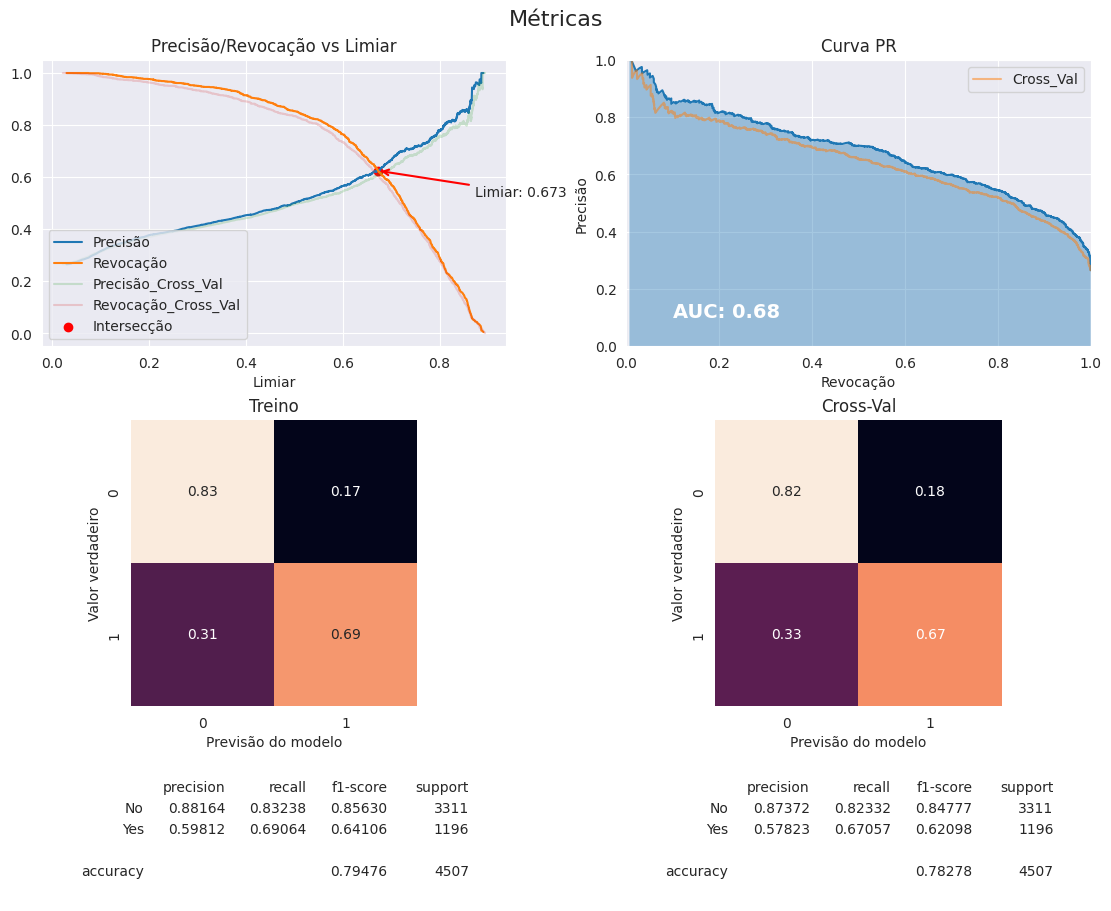

In [ ]:
# visualizar métricas do modelo
validate_model(best_rf_model, X_train, y_train, 0.64)

#### 3. Conclusão

Observações do modelo:

* com limiar de 0.64, recall é maior que precision
* **acurácia entre 78% e 79%**
* evidência de **overfitting baixa**
* reconhece entre **67% e 69% dos casos de churn corretamente**
* não reconhece entre 31% e 33% dos casos de churn
* reconhece corretamente entre **82% e 83% dos casos de não-churn**
* **melhor limiar: 0.64**

### **XGBoost**

#### 1. Tunando Modelo

In [ ]:
# parametros para tunar
xgb_params = {
  'booster' : ['gbtree'],
  'n_estimators' : [90, 100, 110],
  'eta' : [0.05, 0.058, 0.06],
  'max_depth' : [2, 3, 4],
  'eval_metric' : ['aucpr'],
  'subsample' : [0.5, 1.0],
  'max_leaves' : [5, 6, 7],
  'objective' : ['binary:logistic'],
  'min_child_weight' : [1],
  'nthread' : [-1],
  'seed' : [42]
}

# tunando o modelo
xgb_search = tune_model(XGBClassifier(), xgb_params, X_train, y_train)
best_xgb_model = xgb_search.best_estimator_

Melhores parâmetros: {'booster': 'gbtree', 'eta': 0.06, 'eval_metric': 'aucpr', 'max_depth': 3, 'max_leaves': 6, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': -1, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.5}
Score: 0.67


#### 2. Métricas do Modelo

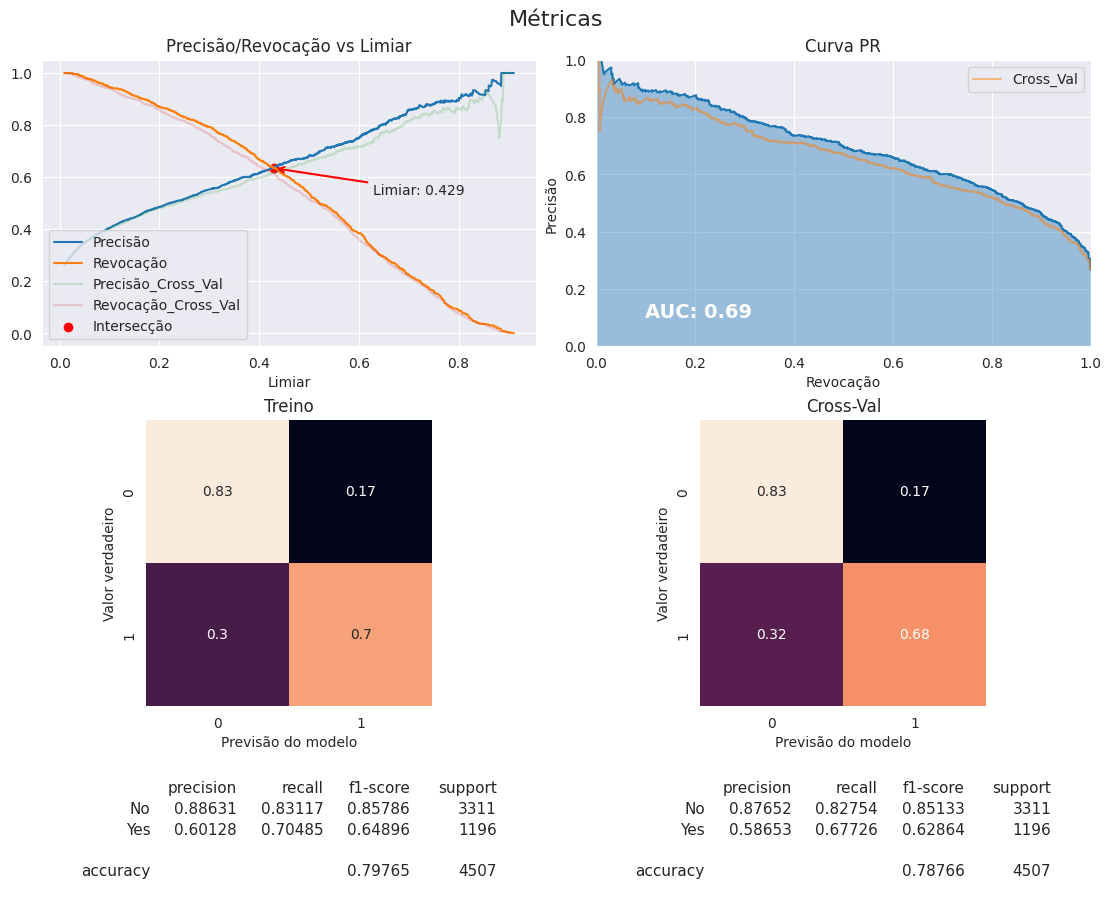

In [ ]:
# visualizar métricas do modelo
validate_model(best_xgb_model, X_train, y_train, 0.375)

#### 3. Conclusão

Observações do modelo:

* com limiar de 0.375, recall é maior que precision
* **acurácia entre 78% e 79%**
* evidência de **overfitting baixa**
* reconhece entre **68% e 70% dos casos de churn corretamente**
* não reconhece entre 30% e 32% dos casos de churn
* reconhece corretamente **83% dos casos de não-churn**
* **melhor limiar: 0.375**

## **Selecionando o Modelo**

Todos os modelos testados têm métricas semelhantes. Em especial, Random Forest e XGBoost foram melhores que os demais.

Como antes focamos em ter modelos mais equilibrados entre recall e precision, agora para selecionar o modelo final, vamos a curva ROC.

Com a curva roc, podemos visualizar a taxa de verdadeiros positivos vs a taxa de falsos positivos pela mudança de limiar, apartir de probabilidades ordenadas.

Dessa forma, buscamos o modelo que tem melhores métriacs na curva roc (no caso, as curvas que melhor preenchem todo o gráfico de visualização e com maior área sob a curva). E para isso, usaremos o conjunto de validação que foi separado anteriormente.

Mas primeiramente, vamos criar uma função para cirar os melhores modelos, dessa forma não preciso treinar novamente os modelos toda vez que entrar neste notebook.

In [ ]:
def create_best_models(X, y):
  lr_model = LogisticRegression(
      C=0.13,
      solver='saga',
      penalty='l1',
      class_weight=None,
      fit_intercept=True,
      max_iter=2000,
      random_state=42
  )

  svc_model = SVC(
      C=0.08,
      kernel='poly',
      degree=1,
      class_weight='balanced',
      shrinking=True,
      probability=True,
      random_state=42
  )

  knn_model = KNeighborsClassifier(
      n_neighbors=75,
      metric='minkowski',
      algorithm='kd_tree',
      p=1
  )

  rf_model = RandomForestClassifier(
      n_estimators=99,
      max_depth=5,
      class_weight='balanced',
      criterion='gini',
      bootstrap=True,
      random_state=42,
      n_jobs=-1
  )

  xgb_model = XGBClassifier(
      booster='gbtree',
      eta=0.06,
      eval_metric='aucpr',
      max_depth=3,
      max_leaves=6,
      min_child_weight=1,
      n_estimators=100,
      nthread=-1,
      objective='binary:logistic',
      seed=42,
      subsample=0.5
  )

  lr_model.fit(X, y)
  svc_model.fit(X, y)
  knn_model.fit(X, y)
  rf_model.fit(X, y)
  xgb_model.fit(X, y)

  return [ lr_model, svc_model, knn_model, rf_model, xgb_model ]

In [ ]:
# criar os melhores modelos
best_models = create_best_models(X_train, y_train)

In [ ]:
def calculate_roc_curve(model, X, y):
  y_scores = model.predict_proba(X)[:, 1]
  return roc_curve(y, y_scores)

def calculate_roc_auc(model, X, y):
  y_scores = model.predict_proba(X)[:, 1]
  return roc_auc_score(y, y_scores)

def create_roc_auc_table(models, X, y):
  roc_auc = { 'model' : [], 'auc' : [] }
  for model in models:
    roc_auc['model'].append(model.__class__.__name__)
    roc_auc['auc'].append(calculate_roc_auc(model, X, y))

  auc_table = pd.DataFrame(data=roc_auc)
  auc_table.set_index('model', inplace=True)
  auc_table.sort_values(by='auc', ascending=False, inplace=True)

  return auc_table

def plot_roc_curve(models, X, y):
  fig, ax = plt.subplots()

  # plotar linha diágonal, referente ao modelo aleatório
  sns.lineplot(x=[0, 1], y=[0, 1], linestyle='dashed', ax=ax, label='aletório')

  line_styles = ['-', '--', ':', '-.', '--']
  ls_index = 0

  for model in models:
    fpr, tpr, _ = calculate_roc_curve(model, X, y)
    sns.lineplot(x=fpr, y=tpr, linestyle=line_styles[ls_index], ax=ax, label=model.__class__.__name__)
    ls_index += 1

  # configurar o plot
  ax.set_title('Curva ROC')
  ax.set_xlim(0, 1)
  ax.set_ylim(0, 1)
  ax.set_xlabel('taxa de falso positvo')
  ax.set_ylabel('taxa de verdadeiro positvo')
  ax.legend(loc='lower right')

  plt.show()

,auc
model,
LogisticRegression,0.850795
XGBClassifier,0.850399
SVC,0.849720
RandomForestClassifier,0.846677
KNeighborsClassifier,0.836064


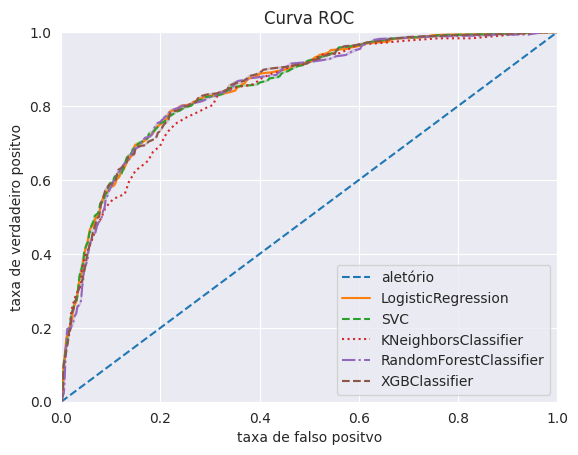

In [ ]:
models_roc_auc_table = create_roc_auc_table(best_models, X_val, y_val)

# visualizar as áreas sob a curva roc
display(models_roc_auc_table)

# plotar as curvas roc
plot_roc_curve(best_models, X_val, y_val)

### **Conclusão**

Analisando a métrica acima, observamos que todos os modelos são muito semelhantes, por isso vou considerar o seguinte:

* KNeighborsClassifier tem a pior curva roc dentre todos os modelos

* SVC apesar de ter a 3º maior valor para auc, é um modelo demorado para treinar

* RandomForestClassifier tem um auc melhor apenas que KNeighborsClassifier

* LogisticRegression tem um valor para auc superior ao XGBClassifier, mas é uma diferença insignificante

Por esses motivos, e por ter métricas melhores no geral, o modelo final será o XGBClassifier.


## **Contruindo o Modelo Final**

Selecionado o modelo, vamos treiná-lo no conjunto completo de dados de treino, já que anteriormente separei este conjunto em treino e validação.

In [ ]:
final_model = XGBClassifier(
    booster='gbtree',
    eta=0.06,
    eval_metric='aucpr',
    max_depth=3,
    max_leaves=6,
    min_child_weight=1,
    n_estimators=100,
    nthread=-1,
    objective='binary:logistic',
    seed=42,
    subsample=0.5
)

final_model.fit(X, y)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric='aucpr',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=6, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, nthread=-1, ...)

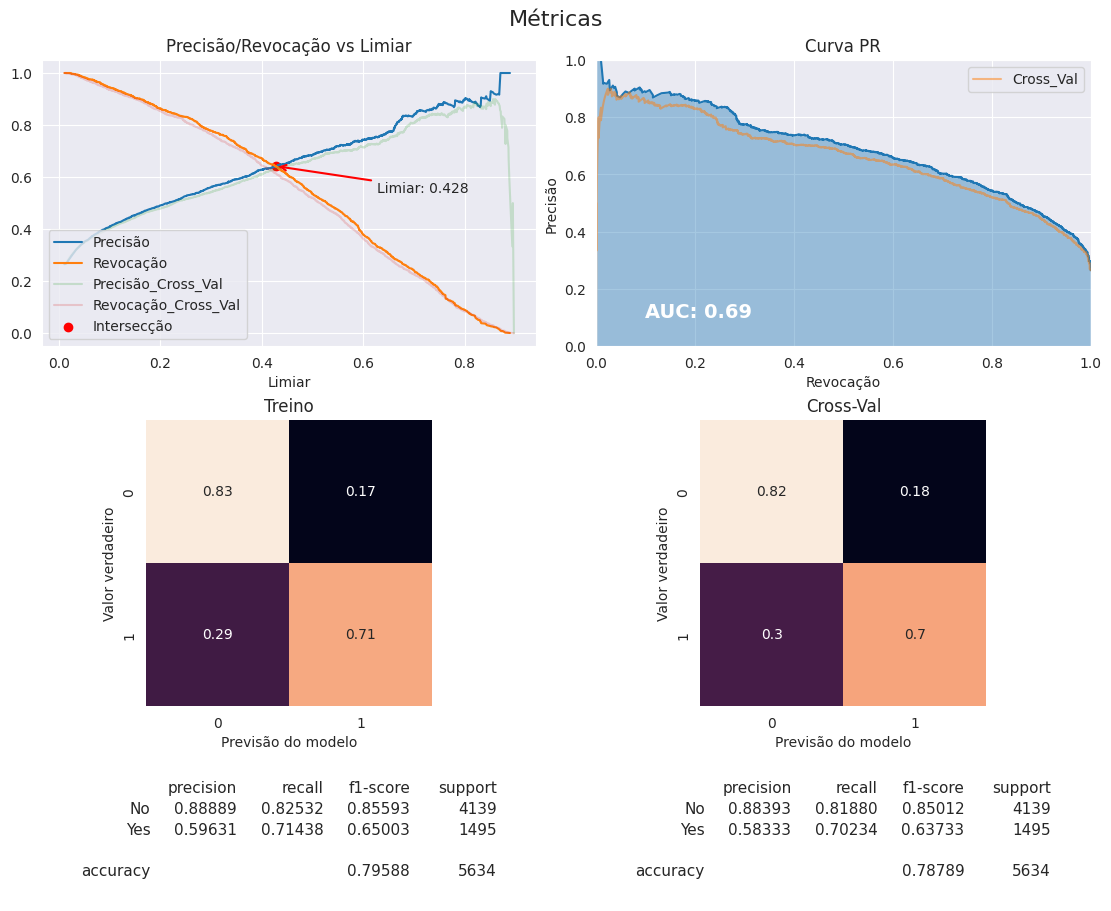

In [ ]:
validate_model(final_model, X, y, 0.36)

### **Consideração Final**

Com o modelo final treinado em todos os dados de treino, eu ajustei o limiar até uma configuração interessante. Agora o limiar é de 0.36, com revocação superior a precisão. Com esta configuração conseguimos:

* **acurácia entre 78% e 79%**
* evidência de **overfitting baixa**
* reconhecer entre **70% e 71% dos casos de churn corretamente**
* não reconhecer entre 29% e 30% dos casos de churn
* reconhece corretamente entre **82% e 83% dos casos de não-churn**

# **5. Validação**

Agora que o modelo final já foi escolhido, vamos validá-lo nos dados de teste. Para isso, primeiro iremos tratar qualquer irregularidade nos dados de teste e por fim faremos o teste final.

In [ ]:
# visualizar as primeiras linhas do dataset de teste
telco_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
437,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.2,No
2280,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,No
2235,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2,No
4460,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,No
3761,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,No


In [ ]:
# visualizar as informações dos dados
telco_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 437 to 5613
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object

Nosso conjunto de teste possui ao todo 1409 entradas e nehum valor ausente. Como nosso modelo não exige a variável TotalCharges, ao precisamos nos preocupar em tratá-la para caso houvesse o mesmo problema que os dados de treino. Dito isto, basta apenas aplicar as devidas transformações nos dados para utilizá-los no modelo.

In [ ]:
def prepare_test_data(df):
  # renomear colunas
  rename_columns(df)

  # preaparar os dados
  X, y = prepare_data(df)

  # aplicar transformações
  X = ct.transform(X)
  y = le.transform(y)

  return X, y

In [ ]:
X_test, y_test = prepare_test_data(telco_test)

Além disso, precisamos de uma função para aplicar o limiar no modelo.

In [ ]:
def model_predict_data(X):
  return final_model.predict_proba(X)[:, 1] >= 0.36

In [ ]:
# prever valores
y_pred = model_predict_data(X_test)

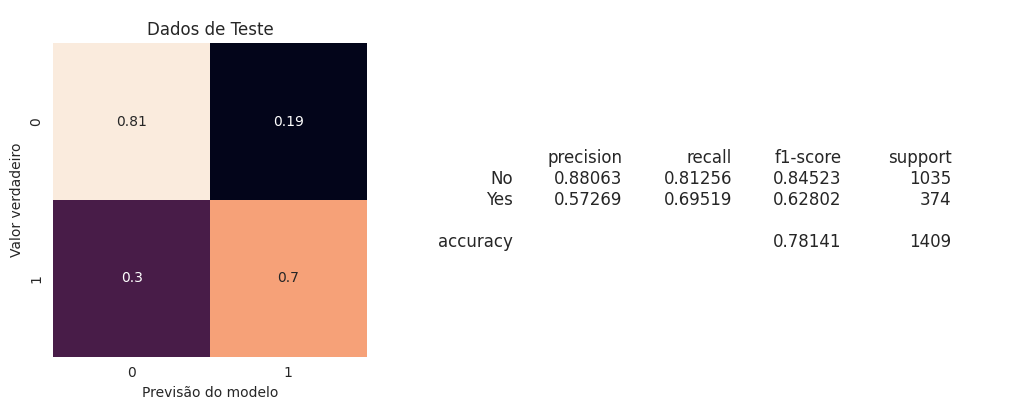

In [ ]:
# visualizar resultados
fig = plt.figure(layout='constrained', figsize=(10, 4))

# layout do plot
gs = GridSpec(nrows=1, ncols=3, figure=fig)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1:])

# plotar métricas
plot_confusion_matrix('Dados de Teste', y_test, y_pred, ax0)
plot_classification_report(y_test, y_pred, ax1)

plt.show()

## **Conclusão**

Na fase de validação, podemos concluir que nosso modelo se saiu muito semelhante aos dados de treino. De forma geral, o modelo conseguiu (nos dados de teste):

* **acurácia de 78%** (superior a um modelo que prevê tudo como não-churn)
* reconhecer **70% dos casos de churn corretamente**
* reconhece **81% dos casos de não-churn**

# **Conclusões Finais**

Com este projeto, fomos capazes de tirar insights interessantes dos dados disponíveis, como:

* A maioria dos casos de churn ocorrem entre o 1º e o 20º mês

* Os casos de churn são maiores entre US&#36; 60.00 e US&#36; 120.00 de cobrança mensal

* A grande maioria dos clientes que deixaram o serviço, assinavam o contrato mês-a-mês

* Clientes com tenure baixo e alto montlhy_charge, tem mais chances de abandonar o serviço

Com essas informações fomos capazes de testar novas features, dentre as quais, a que foi selecionado para o modelo final foi **month_to_month_contract**, que indica se o tipo de contrato é mês-a-mês. A qual têm grande correlação com a variável alvo.

Por fim, após testar alguns modelos de machine learning, o modelo escolhido foi **XGBClassifier**, um modelo baseado em árvores que utiliza uma estrutura de gradient boosting. Ao final esse modelo teve métricas muito semelhantes nos dados de treino e teste, oque nos garante que o modelo não sofre de overfitting.

De modo geral, conseguimos um modelo que:

* **tem acurácia entre 78% e 79%**
* **consegure renconhecer entre 70% e 71% dos casos de churn**
* **rechonhece entre 81% e 83% dos casos de não-churn**

<br>

---

**Obs:**

A fase de implantação não está incluso nesse projeto. Para ser mais de acordo com o entendimento de negócio, definido anteriormente, nessa fase seria criada uma função que nos retornasse as probabilidades dos clientes abandonarem o serviço, ordenada da maior para a menor probabilidade. Contudo, isso não é pertinente para este notebook, que é focado em um caso de estudo.